# Final analysis 

---

Student name: Priscila Strömsdörfer - ps178@hdm-stuttgart.de

---


## Introduction

**Motivation**

Die Sicherstellung der Lieferzuverlässigkeit in der Automobilindustrie ist entscheidend. Probleme mit Liefertermintreue können Produktionsprozesse stören und die Effizienz der Lieferkette beeinträchtigen. Mithilfe von datenbasierten Analysen sollen Schwachstellen identifiziert und Optimierungspotenziale aufgedeckt werden.

Ein typisches Beispiel: Ein wichtiger Lieferant für Radlager meldet einen Lieferverzug von drei Tagen aufgrund von logistischen Problemen. In der Zwischenzeit kann die Montage der Fahrzeuge nicht fortgesetzt werden, da die benötigten Teile fehlen. Dieser Stillstand verursacht nicht nur direkte Produktionskosten, sondern führt auch zu Verzögerungen bei der Auslieferung der Fahrzeuge an Kunden. In hochvernetzten Lieferketten können solche Verzögerungen dominoartige Auswirkungen haben, was das Risiko von Umsatzverlusten und einer geringeren Kundenzufriedenheit erhöht.

**Research Question**

Die zentrale Forschungsfrage lautet:
Welche Faktoren beeinflussen die Liefertermintreue bei produktiven Materialien, und wie können diese Informationen genutzt werden, um zukünftige Abweichungen zu minimieren?

## Setup

**Vorgehensweise**

Die folgende Tabelle beschreibt die geplanten Schritte, die ich für die Datenanalyse vorsehe. Diese Schritte bieten eine klare Struktur, sind jedoch flexibel gestaltet: Es können während der Implementierung neue Schritte hinzukommen oder bestehende entfallen, abhängig von den Anforderungen und Erkenntnissen im Prozess. 

| **Schritt**                              | **Beschreibung**                                                                                   |
|------------------------------------------|---------------------------------------------------------------------------------------------------|
| **1 - Datenextraktion aus SAP**          | Extraktion relevanter Daten aus SAP-Systemen (z. B. EKPO, LIKP, MARA) und Sicherstellung der Integrität. |
| **2 - Datenvorbereitung**                |                                                                                                   |
| **2.1 - Formatierung der Daten**         | Umwandlung der extrahierten Daten in analysierbare Formate (z. B. CSV, Excel).                    |
| **2.2 - Konsistenzprüfung**              | Kontrolle der Daten auf Vollständigkeit und strukturelle Konsistenz.                              |
| **3 - Daten in Python einlesen**         | Import der Dateien in Python (z. B. mit `pandas`) und Prüfung der korrekten Tabellendefinition.   |
| **4 - Explorative Datenanalyse (EDA)**   |                                                                                                   |
| **4.1 - Datenprofiling**                 | Überblick über Struktur: Zeilen, Spalten, Datentypen, fehlende Werte und doppelte Einträge.       |
| **4.2 - Datenbereinigung und Qualität**  | Korrektur fehlender Werte, Inkonsistenzen und doppelter Einträge; Sicherstellung der Datenqualität. |
| **4.3 - Tabellenverknüpfung erstellen**  | Verknüpfung relevanter SAP-Tabellen anhand gemeinsamer Schlüsselspalten (z. B. Bestellnummer).    |
| **4.4 - Descriptive Statistics**         | Berechnung von Mittelwert, Median, Minimum, Maximum, Häufigkeiten und Standardabweichung.         |
| **4.5 - Graphische Datenverteilung**     | Visualisierung: Histogramme, Balkendiagramme, Boxplots zur Verteilung und Ausreißeranalyse.       |
| **5 - Hypothesenprüfung und Modellierung** |                                                                                                   |
| **5.1 - Hypothesenvalidierung**          | Durchführung von Tests (z. B. Chi-Quadrat) zur Überprüfung der definierten Hypothesen.     |
| **5.2 - Statistische Modelle**           | Aufbau von Modellen wie Logistische Regression oder Random Forest zur Analyse von Einflussfaktoren. |
| **5.3 - Zeitreihenanalyse**              | Untersuchung von Trends und saisonalen Mustern in den Lieferdaten.                               |
| **6 - Ergebnisdarstellung und Interpretation** | Zusammenfassung der Erkenntnisse, Diagramme und identifizierte Einflussfaktoren.                |
| **7 - Optimierungspotenziale**           | Handlungsempfehlungen zur Verbesserung der Liefertermintreue und datenbasierte Optimierungsstrategien. |

## Data

### Import data

Die Daten-Logik für diese Analyse stammen aus dem SAP-basierten Logistiksystem Automotive Supply. Sie wurden zuvor aus den relevanten Tabellen (z. B. EKKO, EKPO, EKBE, LIKP, LIPS, MSEG, MARA, MARC, MAKT, LFA1) extrahiert. Diese Tabellen enthalten Informationen zu Bestellungen, Lieferungen, Material- und Lieferantenstammdaten, die essenziell für die Untersuchung der Liefertermintreue sind.

Datentabellen werden direkt in SAP abgerufen und mit einander verknüpft sodass, eine finale Datei entsteht. 

Für diese Projektarbeit wurden Dummy-Daten auf Basis der Tabellenstruktur aus SAP generiert. Vorteil dabei ist, dass der Python-Notebook ausführbar ist und keine Sensible Daten komprometiert werden. 
Bei eine zukünftige Zeitpunkt kann das Model auf das original Daten angewendet werden. Das ist aber nicht bestandteil dieses Projektarbeit.

*Punkt 1 und 2 - Datenbereinigung findet sonfern nötig hier statt. 
*Punkt 3, 4 und 5 findet direkt in SAP statt. 

| **Schritt**               | **Beschreibung**                                                                                   |
|---------------------------|---------------------------------------------------------------------------------------------------|
| **1. Einlesen der Daten**  | Import der extrahierten Daten aus SAP in das Notebook (z. B. CSV- oder Excel-Dateien).            |
| **2. Bereinigung der Daten** | Prüfung auf Konsistenz: Entfernen von fehlenden Werten, doppelten Einträgen und fehlerhaften Daten. |
| **3. Standardisierung**    | Vereinheitlichung der Formate, z. B. für Datumsangaben oder numerische Werte.                     |
| **4. Verknüpfung der Tabellen** | Verknüpfung der Daten mithilfe gemeinsamer Schlüsselspalten (z. B. Bestellnummer, Lieferantennummer). |
| **5. Konsolidierung**      | Erstellung eines konsolidierten Datensatzes als Basis für weitere Analysen.                       |

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:

# Bibliotheken
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn
import joblib
from scipy.stats import chi2_contingency

### Datenladen

In [3]:
# Einlesen der Excel-Daten
var_file_path = "../data/raw/liefertreue_dataset_2024.xlsx"  # 2024
dataset_2024_df = pd.read_excel(var_file_path)

### Datenvorschau: Erste 5 Einträge

In [4]:
# Überblick über die Daten
dataset_2024_df.head()

,Lieferscheinnummer,Lieferantennummer,Lieferantenbezeichnung,Materialnummer,Materialbezeichnung,Land,Bestelldatum,Lieferdatum (Soll),Wareneingangsdatum (WE),Soll-Menge,WE-Menge
0,LS5412357,LA1031,SEW-EUR,A2341441,Steuerungen,PL,2024-03-11,2024-04-09,2024-04-09,110,104
1,LS9371283,LA1015,Wieland-Werk,A1842836,Kupferlegierungen,DE,2024-07-15,2024-08-08,2024-08-11,198,210
2,LS6013338,LA1014,LEONI AG,A1624957,Kabel,CH,2024-03-19,2024-03-26,2024-03-26,94,88
3,LS7058941,LA1018,SEW-EURODRIV,A8657694,Getriebemotoren,DE,2024-08-12,2024-08-26,2024-08-31,250,237
4,LS2038973,LA1025,thyssenkrupp,A1864991,Lenksysteme,DE,2024-11-30,2024-12-21,2024-12-21,227,230


### Überprüfung Datentypen und Null-Werte

In [5]:
# Überprüfung Datentypen und Null-Werte
dataset_2024_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Lieferscheinnummer       30000 non-null  object        
 1   Lieferantennummer        30000 non-null  object        
 2   Lieferantenbezeichnung   30000 non-null  object        
 3   Materialnummer           30000 non-null  object        
 4   Materialbezeichnung      30000 non-null  object        
 5   Land                     30000 non-null  object        
 6   Bestelldatum             30000 non-null  datetime64[ns]
 7   Lieferdatum (Soll)       30000 non-null  datetime64[ns]
 8   Wareneingangsdatum (WE)  30000 non-null  datetime64[ns]
 9   Soll-Menge               30000 non-null  int64         
 10  WE-Menge                 30000 non-null  int64         
dtypes: datetime64[ns](3), int64(2), object(6)
memory usage: 2.5+ MB


### Datenqualitäsprüfung

In diese Abschnitt wurden folgedege Datenüberprüfungen durchgeführt: 

1.	Prüfung fehlender Werte:

- Identifikation fehlender Werte in jeder Spalte.

- Entfernung von Zeilen mit fehlenden Schlüsseldaten (z. B. Lieferscheinnummer, Materialnummer).

2.	Duplikate im Datensatz identifizieren:

- Überprüfung auf doppelte Einträge im Datensatz.

- Entfernung redundanter Daten, um Konsistenz sicherzustellen.

3.	Plausibilitätsprüfung:

- Datum: Überprüfung, ob das Wareneingangsdatum (WE) nicht vor dem Bestelldatum liegt.

- Menge: Sicherstellen, dass Soll-Menge und WE-Menge keine negativen Werte aufweisen.

- Datenplausibilisierung der Datumsfeldern und Menge, im Anschluss Anomalie entfernen. 


4.	Prüfung eindeutiger Werte:

- Zählen der unique values je Spalte, um die Datenvielfalt zu analysieren (z. B. unterschiedliche Lieferanten, Materialien, Länder).
	
5.	Statistische Werte:

- Berechnung beschreibender Statistiken für numerische Spalten (Soll-Menge, WE-Menge, verspätungstage).
	
- Analyse von Mittelwert, Median, Standardabweichung und Quartilen.

### Fehlende Werte überprüfen

In [6]:
# Fehlende Werte prüfen
missing_values = dataset_2024_df.isnull().sum()
print("Fehlende Werte:\n", missing_values)

# Zeilen mit fehlenden Werten entfernen
cleaned_liefertreue_2024_df = dataset_2024_df.dropna()

Fehlende Werte:
 Lieferscheinnummer         0
Lieferantennummer          0
Lieferantenbezeichnung     0
Materialnummer             0
Materialbezeichnung        0
Land                       0
Bestelldatum               0
Lieferdatum (Soll)         0
Wareneingangsdatum (WE)    0
Soll-Menge                 0
WE-Menge                   0
dtype: int64


### Duplikate im Datensatz identifizieren

In [7]:
# Doppelte Einträge prüfen
var_anzahl_doppelte_Einträge = cleaned_liefertreue_2024_df.duplicated().sum()
print(f"Anzahl doppelte Einträge: {var_anzahl_doppelte_Einträge}")

# Für künftige Analyse möchte ich gerne die Duplikaten anschauen, um die Datenqualität zu verbessern
# Doppelte Einträge in einen separaten DataFrame speichern
duplicates_dataset = cleaned_liefertreue_2024_df[cleaned_liefertreue_2024_df.duplicated()]
print("Duplikaten wurden in duplicates_dataset gespeichert.")

# Doppelte Einträge entfernen
cleaned_liefertreue_2024_df = cleaned_liefertreue_2024_df.drop_duplicates()
print("Duplikaten wurden aus cleaned_liefertreue_2024_df entfernt.")

Anzahl doppelte Einträge: 846
Duplikaten wurden in duplicates_dataset gespeichert.
Duplikaten wurden aus cleaned_liefertreue_2024_df entfernt.


### Plausibilitätsprüfung - Menge
### **Daten Anomalien beseitigen** 
Die Anomalien wurden anhand der folgenden Regeln identifiziert:
- Negative Soll-Menge: Ein negativer Wert bei Soll-Menge bedeutet, dass die angeforderte Menge fehlerhaft ist. Es sollte keine Bestellung mit negativen Mengen geben.
- Negative WE-Menge: Ein negativer Wert bei WE-Menge (Wareneingangsmenge) ist ebenfalls ein klarer Fehler, da physische Lieferungen keine negativen Werte haben können.
- Unlogisches Wareneingangsdatum: Wenn das Wareneingangsdatum (WE) vor dem Bestelldatum liegt, deutet dies auf einen Fehler in der Datenerfassung hin, da eine Lieferung nicht vor der Bestellung erfolgen kann.

| **Aspekt**            | **Beschreibung**                                                                             | **Maßnahmen**                                                                                 |
|------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **Fehlende Werte**     | Identifikation und Umgang mit fehlenden Einträgen                                           | - Imputation (z. B. Mittelwert, Median)                                                     |
|                        |                                                                                             | - Löschen von Einträgen, wenn nicht ausreichend Informationen verfügbar sind                |
| **Doppelte Werte**     | Identifikation und Bereinigung redundanter Daten                                            | - Entfernen doppelter Einträge auf Basis relevanter Schlüsselfelder                         |
| **Anomalien**          | Identifikation ungewöhnlicher Werte (z. B. negative Mengen, unrealistische Zeitangaben)     | - Überprüfung auf Plausibilität und Entfernung oder Korrektur dieser Werte                  |
| **Standardisierung**   | Einheitliche Formate für Daten wie LIFNR, MATNR |                  |

In [8]:
# Überprüfung auf Anomalien
print("Überprüfung auf Anomalien:")
anomalies = cleaned_liefertreue_2024_df[
    (cleaned_liefertreue_2024_df["Soll-Menge"] < 0) |
    (cleaned_liefertreue_2024_df["WE-Menge"] < 0) |
    (cleaned_liefertreue_2024_df["Wareneingangsdatum (WE)"] < cleaned_liefertreue_2024_df["Bestelldatum"])
]

# Anzahl der Anomalien
var_anzahl_anomalie = len(anomalies)
print("Anzahl der Anomalien:", var_anzahl_anomalie)

# Wenn keine Anomalien vorhanden sind
if anomalies.empty:
    print("Ergebnis: Keine Anomalien gefunden – alle Werte sind logisch konsistent.")
else:
    # Zeige die ersten Anomalien zur Überprüfung
    print("Anomalien gefunden:\n", anomalies.head())
    
    # Speichere die Anomalien in einen separaten DataFrame
    anomalies_df = anomalies.copy()
    print(f"\n{var_anzahl_anomalie} Anomalien wurden in 'anomalies_df' gespeichert für künftige Betrachtung.")
    anomalies_df.head()
    
    # Entferne die Anomalien aus dem ursprünglichen DataFrame
    cleaned_liefertreue_2024_df = cleaned_liefertreue_2024_df.drop(anomalies.index)
    print(f"Anomalien wurden aus 'cleaned_liefertreue_2024_df' entfernt.")
    
    # Zeige die Anzahl der verbleibenden Datensätze
    print(f"\nAnzahl der verbleibenden Datensätze nach Bereinigung: {len(cleaned_liefertreue_2024_df)}")
    cleaned_liefertreue_2024_df.head()

Überprüfung auf Anomalien:
Anzahl der Anomalien: 230
Anomalien gefunden:
     Lieferscheinnummer Lieferantennummer Lieferantenbezeichnung  \
214          LS9267244            LA1027           ZF Friedrich   
522          LS9705895            LA1025           thyssenkrupp   
604          LS1315992            LA1025           thyssenkrupp   
641          LS8762809            LA1006            Freudenberg   
755          LS3469208            LA1005             MAHLE GmbH   

    Materialnummer Materialbezeichnung Land Bestelldatum Lieferdatum (Soll)  \
214       A4588446            Fahrwerk   FR   2024-12-13         2024-01-10   
522       A1725455         Lenksysteme   DE   2024-12-06         2024-01-02   
604       A6724311             Dämpfer   DE   2024-12-09         2024-01-03   
641       A2010580            Bauteile   PL   2024-12-10         2024-01-04   
755       A1164566             Antrieb   DE   2024-12-13         2024-01-07   

    Wareneingangsdatum (WE)  Soll-Menge  WE-Meng

### Anzahl eindeutige Werte pro Spalte

In [9]:
# Anzahl der Zeilen und Spalten anzeigen
shape = cleaned_liefertreue_2024_df.shape
print(f"Anzahl Zeilen: {shape[0]}, Anzahl Spalten: {shape[1]}\n")

var_anzahl_datensätze_start_analyse = shape[0]
var_anzahl_spalten_start_analyse = shape[1]

# Anzahl der eindeutigen Werte je Spalte

unique_counts = cleaned_liefertreue_2024_df.nunique()

print("Anzahl der eindeutigen Werte je Spalte:")

# Konvertiere das Dictionary in einen DataFrame
df_unique_counts = pd.DataFrame(list(unique_counts.items()), columns=['Spalte-Bezeichnung', 'Anzahl eindeutige Werte'])

# Ergebnis als Pivot-Tabelle anzeigen
df_unique_counts


Anzahl Zeilen: 28924, Anzahl Spalten: 11

Anzahl der eindeutigen Werte je Spalte:


,Spalte-Bezeichnung,Anzahl eindeutige Werte
0,Lieferscheinnummer,28869
1,Lieferantennummer,21
2,Lieferantenbezeichnung,21
3,Materialnummer,32
4,Materialbezeichnung,25
5,Land,8
6,Bestelldatum,349
7,Lieferdatum (Soll),365
8,Wareneingangsdatum (WE),365
9,Soll-Menge,451


### Statistische Zusammenfassung der numerische Daten

In [10]:
# Statistische Zusammenfassung der numerischen Spalten
int_columns_description = cleaned_liefertreue_2024_df.select_dtypes(include=['int64']).describe()

print("Statistische Beschreibung der Integer-Werte:")
print(int_columns_description)

Statistische Beschreibung der Integer-Werte:
         Soll-Menge      WE-Menge
count  28924.000000  28924.000000
mean     275.904232    275.366789
std      129.880551    131.024802
min       50.000000     45.000000
25%      164.000000    162.000000
50%      275.000000    274.000000
75%      388.000000    387.000000
max      500.000000    549.000000


### Statistische Zusammenfassung der Datumsfelder

In [11]:
# Minimum und Maximum für die Datumsfelder
date_columns = ["Bestelldatum", "lieferdatum (Soll)", "Wareneingangsdatum (WE)"]

# Überprüfen, ob die Spalten im DataFrame vorhanden sind
date_columns = [col for col in date_columns if col in cleaned_liefertreue_2024_df.columns]

# Min und Max für die Datumsfelder berechnen
date_min_max = cleaned_liefertreue_2024_df[date_columns].agg(["min", "max"])

#print("Min- und Max-Werte für die Datumsfelder:")
print(date_min_max)

    Bestelldatum Wareneingangsdatum (WE)
min   2024-01-01              2024-01-02
max   2024-12-14              2024-12-31


## Data structure

EKKO/EKPO (Bestellungen) --> EKBE (Einkaufsbelege Historie) --> LIKP (Lieferungen) --> LIPS (Lieferpositionen)
               |                          |                           |
               +-----> LFA1 (Lieferanten) +-----> MARA (Material) -----> MARC (Materialstandorte)


### **Tabellen und Spalten** 

Diese Tabellenstruktur beschreibt eine SAP-basierte Datenquelle, die in der realen Welt genutzt wird. In dieser Projektarbeit wurden jedoch generierte Dummy-Datensätze verwendet, die auf dieser Logik basieren.

| **Feldbezeichnung**                 | **Tabellenname** | **Technischer Spaltenname** | **Beschreibung**                                                             | **Rolle**          | **Typ**       | **Format**    |
|:--------------------------|------------------|-----------------------------|-----------------------------------------------------------------------------|--------------------|---------------|---------------|
| **Bestellnummer**        | EKKO/EKPO        | EBELN                       | Eindeutige Kennung jeder Bestellung                                         | ID                 | Nominal       | String        |
| **Bestelldatum**         | EKKO             | BEDAT                       | Datum, an dem die Bestellung erstellt wurde                                | Prädiktor          | Ordinal       | Datum         |
| **Geplantes Lieferdatum**| EKBE           | EINDT                       | Geplantes Datum der Lieferung                                              | Prädiktor          | Ordinal       | Datum         |
| **Bestellte Menge**      | EKPO             | MENGE                       | Anzahl der bestellten Einheiten                                            | Prädiktor          | Numerisch     | Ganzzahl      |
| **Liefernummer**         | LIKP             | VBELN                       | Eindeutige Kennung jeder Lieferung                                         | ID                 | Nominal       | String        |
| **Lieferdatum**          | LIKP             | WADAT                       | Tatsächliches Datum der Lieferung                                          | Prädiktor          | Ordinal       | Datum         |
| **Gelieferte Menge**     | LIPS             | LFIMG                       | Anzahl der tatsächlich gelieferten Einheiten                               | Prädiktor          | Numerisch     | Ganzzahl      |
| **Lieferabweichung**     | Berechnet        | Berechnet                   | Differenz zwischen geplantem und tatsächlichem Lieferdatum                 | Prädiktor          | Numerisch     | Dezimal       |
| **Mengenabweichung**     | Berechnet        | Berechnet                   | Differenz zwischen bestellter und gelieferter Menge                        | Prädiktor          | Numerisch     | Dezimal       |
| **Termintreue**          | Berechnet        | Berechnet                   | Indikator, ob die Lieferung pünktlich, verspätet oder früh erfolgte        | Zielvariable       | Nominal       | Kategorie     |
| **Lieferantennummer**    | LFA1             | LIFNR                       | Eindeutige Kennung des Lieferanten                                         | ID                 | Nominal       | String        |
| **Lieferantenname**      | LFA1             | NAME1                       | Name des Lieferanten                                                       | Prädiktor          | Nominal       | String        |
| **Land**                 | LFA1             | LAND1                       | Land des Lieferanten                                                       | Prädiktor          | Nominal       | String        |
| **Materialnummer**       | MARA             | MATNR                       | Eindeutige Kennung des Materials                                           | ID                 | Nominal       | String        |
| **Materialkategorie**    | MARA             | MTART                       | Typ oder Kategorie des Materials (z. B. Rohmaterial, Fertigprodukt)        | Prädiktor          | Nominal       | String        |
| **Werk**                 | MARC             | WERKS                       | Werk oder Produktionsstandort, der mit dem Material verbunden ist          | Prädiktor          | Nominal       | String        |
| **Belieferungsmethode**  | MARC             | CC_DELMTHD           | Methode der Lieferung (JIT, JIS, KON)               | Prädiktor          | Nominal       | Kategorie        |

Die Spalten Belieferungsmethode, Werk und Bestellnummer sind aus organisatorischen Gründen in diesem Datensatz nicht enthalten.

### **Standardisierung - Werte**

In [12]:
# Standardisierung Bezeichnungen und LAND und Spaltenname ohne Leerzeichen

print("\nStandardisierungsmaßnahmen:")
standardizations = {
    "Lieferantenbezeichnung": "Lieferantenbezeichnungen auf Großbuchstaben standardisiert.",
    "Materialbezeichnung": "Materialbezeichnungen auf Großbuchstaben standardisiert.",
    "Land": "Ländercodes auf Großbuchstaben standardisiert."
}

# Anwenden der Standardisierung
cleaned_liefertreue_2024_df["Lieferantenbezeichnung"] = cleaned_liefertreue_2024_df["Lieferantenbezeichnung"].str.upper()
cleaned_liefertreue_2024_df["Materialbezeichnung"] = cleaned_liefertreue_2024_df["Materialbezeichnung"].str.upper()
cleaned_liefertreue_2024_df["Land"] = cleaned_liefertreue_2024_df["Land"].str.upper()

# Liste der Standardisierungen ausgeben
for column, description in standardizations.items():
    print(f"- {description} (Spalte: {column})")

# Vorschau auf die verbesserten Daten
print("\nVorschau auf die verbesserten Daten:")
cleaned_liefertreue_2024_df.head()

#cleaned_liefertreue_2024_df = cleaned_liefertreue_2024_df.copy()



Standardisierungsmaßnahmen:
- Lieferantenbezeichnungen auf Großbuchstaben standardisiert. (Spalte: Lieferantenbezeichnung)
- Materialbezeichnungen auf Großbuchstaben standardisiert. (Spalte: Materialbezeichnung)
- Ländercodes auf Großbuchstaben standardisiert. (Spalte: Land)

Vorschau auf die verbesserten Daten:


,Lieferscheinnummer,Lieferantennummer,Lieferantenbezeichnung,Materialnummer,Materialbezeichnung,Land,Bestelldatum,Lieferdatum (Soll),Wareneingangsdatum (WE),Soll-Menge,WE-Menge
0,LS5412357,LA1031,SEW-EUR,A2341441,STEUERUNGEN,PL,2024-03-11,2024-04-09,2024-04-09,110,104
1,LS9371283,LA1015,WIELAND-WERK,A1842836,KUPFERLEGIERUNGEN,DE,2024-07-15,2024-08-08,2024-08-11,198,210
2,LS6013338,LA1014,LEONI AG,A1624957,KABEL,CH,2024-03-19,2024-03-26,2024-03-26,94,88
3,LS7058941,LA1018,SEW-EURODRIV,A8657694,GETRIEBEMOTOREN,DE,2024-08-12,2024-08-26,2024-08-31,250,237
4,LS2038973,LA1025,THYSSENKRUPP,A1864991,LENKSYSTEME,DE,2024-11-30,2024-12-21,2024-12-21,227,230


### **Standardisierung - Spaltenname**

In [13]:
# Entferne doppelte Unterstriche nach der Ersetzung
cleaned_liefertreue_2024_df.columns = (
    cleaned_liefertreue_2024_df.columns
    .str.replace(" ", "_", regex=False)         # Leerzeichen durch "_"
    .str.replace(r"\(|\)", "", regex=True)
    .str.replace("-", "_", regex=True)   
    .str.lower()                                # Konvertiere in Kleinschreibung
)

# Überprüfung der aktualisierten Spaltennamen
print("Bereinigte Spaltennamen (Kleingeschrieben, ohne Klammer, Leerzeichen und Minus-Zeichen):")
print(cleaned_liefertreue_2024_df.columns.tolist())

Bereinigte Spaltennamen (Kleingeschrieben, ohne Klammer, Leerzeichen und Minus-Zeichen):
['lieferscheinnummer', 'lieferantennummer', 'lieferantenbezeichnung', 'materialnummer', 'materialbezeichnung', 'land', 'bestelldatum', 'lieferdatum_soll', 'wareneingangsdatum_we', 'soll_menge', 'we_menge']


In [14]:
cleaned_liefertreue_2024_df.head()

,lieferscheinnummer,lieferantennummer,lieferantenbezeichnung,materialnummer,materialbezeichnung,land,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge
0,LS5412357,LA1031,SEW-EUR,A2341441,STEUERUNGEN,PL,2024-03-11,2024-04-09,2024-04-09,110,104
1,LS9371283,LA1015,WIELAND-WERK,A1842836,KUPFERLEGIERUNGEN,DE,2024-07-15,2024-08-08,2024-08-11,198,210
2,LS6013338,LA1014,LEONI AG,A1624957,KABEL,CH,2024-03-19,2024-03-26,2024-03-26,94,88
3,LS7058941,LA1018,SEW-EURODRIV,A8657694,GETRIEBEMOTOREN,DE,2024-08-12,2024-08-26,2024-08-31,250,237
4,LS2038973,LA1025,THYSSENKRUPP,A1864991,LENKSYSTEME,DE,2024-11-30,2024-12-21,2024-12-21,227,230


In [15]:
# Anomalien speichern
output_path = "../data/processed/anomalien_dataset_liefertreue_2024.xlsx"
anomalies_df.to_excel(output_path, index=False)
print(f"Die Datenanomalien wurden gespeichert unter: {output_path}\n")

# Speichere den bereinigten Datensatz
output_path = "../data/processed/bereinigte_dataset_leifertreue_2024.xlsx"
cleaned_liefertreue_2024_df.to_excel(output_path, index=False)
print(f"Die bereinigten Daten wurden gespeichert unter: {output_path}\n")

# Anzahl der Zeilen und Spalten anzeigen
shape = cleaned_liefertreue_2024_df.shape
print(f"Anzahl Zeilen: {shape[0]}, Anzahl Spalten: {shape[1]}\n")

Die Datenanomalien wurden gespeichert unter: ../data/processed/anomalien_dataset_liefertreue_2024.xlsx

Die bereinigten Daten wurden gespeichert unter: ../data/processed/bereinigte_dataset_leifertreue_2024.xlsx

Anzahl Zeilen: 28924, Anzahl Spalten: 11



### Variable/Kennzahlen Liste

**Tabellarische Übersicht: Kennzahlen im Datensatz**

| **Variable Name**          | **Type**          | **Description**                                                        | **Role**              | **Format**      |
|-----------------------------|-------------------|------------------------------------------------------------------------|-----------------------|-----------------|
| **liefertreue**             | Float             | Anteil pünktlicher Lieferungen (in %)                                   | Zielvariable          | Dezimalzahl     |
| **otd_rate**                | Float             | On-Time Delivery: Anteil der pünktlich gelieferten Bestellungen         | Kennzahl/Prädiktor    | Dezimalzahl     |
| **otif_rate**               | Float             | On-Time In-Full: Anteil der pünktlich und vollständig gelieferten Bestellungen | Kennzahl/Prädiktor    | Dezimalzahl     |
| **mengenabweichung**        | Float             | Differenz zwischen der Soll- und Ist-Menge pro Bestellung (in %)         | Kennzahl/Prädiktor    | Dezimalzahl     |
| **jahreszeit**              | String/Kategorie  | Jahreszeit des geplanten Lieferdatums (Winter, Sommer, Frühling, Herbst)| Abgeleitet/Prädiktor  | Kategorie       |
| **verspätungstage**         | Integer           | Anzahl der Tage zwischen dem geplanten und dem tatsächlichen Lieferdatum| Kennzahl/Prädiktor    | Ganzzahl        |

**Zusammenfassung**
Diese Übersicht bietet eine klare Darstellung der relevanten Kennzahlen im Datensatz:
1. **Liefertreue**, **OTD-Rate**, und **OTIF-Rate** bewerten die Termintreue und Qualität der Lieferungen.
2. **Mengenabweichung** untersucht Probleme bei Über- oder Unterlieferungen.
3. **Jahreszeit** ermöglicht die Analyse saisonaler Muster.
4. **Verspätungstage** quantifizieren Verzögerungen und identifizieren kritische Lieferanten.

Diese Kennzahlen bilden die Grundlage für die Analyse der Lieferperformance.

#### Verspätungstage
- **Definition:** Anzahl der Tage, um die das tatsächliche Lieferdatum vom geplanten Lieferdatum abweicht.
- **Berechnung:**
  `Verspätungstage = Wareneingangsdatum - Lieferdatum (Soll)`
- **Bedeutung:** Quantifiziert die Verzögerung bei Lieferungen.

#### Liefertreue und Termintreue
- **Definition:** Der prozentuale Anteil der Lieferungen, die pünktlich erfolgten.
- **Berechnung:**
  `Liefertreue = (Anzahl der pünktlichen Lieferungen / Gesamtanzahl der Lieferungen) * 100`
- **Bedeutung:** Zeigt, wie zuverlässig die Lieferanten die geplanten Liefertermine eingehalten haben.


In [16]:
cleaned_liefertreue_2024_df

,lieferscheinnummer,lieferantennummer,lieferantenbezeichnung,materialnummer,materialbezeichnung,land,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge
0,LS5412357,LA1031,SEW-EUR,A2341441,STEUERUNGEN,PL,2024-03-11,2024-04-09,2024-04-09,110,104
1,LS9371283,LA1015,WIELAND-WERK,A1842836,KUPFERLEGIERUNGEN,DE,2024-07-15,2024-08-08,2024-08-11,198,210
2,LS6013338,LA1014,LEONI AG,A1624957,KABEL,CH,2024-03-19,2024-03-26,2024-03-26,94,88
3,LS7058941,LA1018,SEW-EURODRIV,A8657694,GETRIEBEMOTOREN,DE,2024-08-12,2024-08-26,2024-08-31,250,237
4,LS2038973,LA1025,THYSSENKRUPP,A1864991,LENKSYSTEME,DE,2024-11-30,2024-12-21,2024-12-21,227,230
...,...,...,...,...,...,...,...,...,...,...,...
29995,LS1146480,LA1027,ZF FRIEDRICH,A4588446,FAHRWERK,FR,2024-10-09,2024-10-28,2024-10-28,389,412
29996,LS9135955,LA1015,WIELAND-WERK,A1842836,KUPFERLEGIERUNGEN,DE,2024-03-22,2024-04-02,2024-04-02,214,213
29997,LS3895714,LA1014,LEONI AG,A1624957,KABEL,CH,2024-08-20,2024-08-26,2024-08-26,405,370
29998,LS2800736,LA1014,LEONI AG,A1624957,KABEL,CH,2024-02-01,2024-02-27,2024-02-27,499,526


In [17]:
# Verspätungen
# Konvertiere die Spalten in datetime und setze ungültige Werte auf NaT
cleaned_liefertreue_2024_df["lieferdatum_soll"] = pd.to_datetime(
    cleaned_liefertreue_2024_df["lieferdatum_soll"], errors="coerce"
)
cleaned_liefertreue_2024_df["wareneingangsdatum_we"] = pd.to_datetime(
    cleaned_liefertreue_2024_df["wareneingangsdatum_we"], errors="coerce"
)

# Berechnung der Verspätungstage
cleaned_liefertreue_2024_df["verspätungstage"] = (
    cleaned_liefertreue_2024_df["wareneingangsdatum_we"] - cleaned_liefertreue_2024_df["lieferdatum_soll"]
).dt.days

# Berechnung der Liefertreue (Ja/Nein)
cleaned_liefertreue_2024_df["liefertreue"] = cleaned_liefertreue_2024_df["verspätungstage"].apply(
    lambda x: "Ja" if x <= 0 else "Nein"
)

# Berechnung der Termintreue (pünktlich, früh, verspätet)
def calculate_termintreue(row):
    if row["wareneingangsdatum_we"] == row["lieferdatum_soll"]:
        return "pünktlich"
    elif row["wareneingangsdatum_we"] < row["lieferdatum_soll"]:
        return "früh"
    else:
        return "verspätet"

cleaned_liefertreue_2024_df["termintreue"] = cleaned_liefertreue_2024_df.apply(calculate_termintreue, axis=1)

cleaned_liefertreue_2024_df.head()

,lieferscheinnummer,lieferantennummer,lieferantenbezeichnung,materialnummer,materialbezeichnung,land,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge,verspätungstage,liefertreue,termintreue
0,LS5412357,LA1031,SEW-EUR,A2341441,STEUERUNGEN,PL,2024-03-11,2024-04-09,2024-04-09,110,104,0,Ja,pünktlich
1,LS9371283,LA1015,WIELAND-WERK,A1842836,KUPFERLEGIERUNGEN,DE,2024-07-15,2024-08-08,2024-08-11,198,210,3,Nein,verspätet
2,LS6013338,LA1014,LEONI AG,A1624957,KABEL,CH,2024-03-19,2024-03-26,2024-03-26,94,88,0,Ja,pünktlich
3,LS7058941,LA1018,SEW-EURODRIV,A8657694,GETRIEBEMOTOREN,DE,2024-08-12,2024-08-26,2024-08-31,250,237,5,Nein,verspätet
4,LS2038973,LA1025,THYSSENKRUPP,A1864991,LENKSYSTEME,DE,2024-11-30,2024-12-21,2024-12-21,227,230,0,Ja,pünktlich


#### Mengenabweichung
- **Definition:** Prozentsatz der Abweichung zwischen der Soll-Menge und der Ist-Menge einer Lieferung.
- **Berechnung:**
  `Mengenabweichung (%) = ((Soll-Menge - Ist-Menge) / Soll-Menge) * 100`
- **Bedeutung:** Identifiziert Lieferprobleme durch Über- oder Unterlieferungen.

In [18]:
# Berechnung der Anteil Mengenabweichung
cleaned_liefertreue_2024_df["mengenabweichung_anteil"] = (
    (cleaned_liefertreue_2024_df["soll_menge"] - cleaned_liefertreue_2024_df["we_menge"]) /
    cleaned_liefertreue_2024_df["soll_menge"]
) * 100

# Berechnung der Mengenabweichung
cleaned_liefertreue_2024_df["mengenabweichung"] = (
    cleaned_liefertreue_2024_df["we_menge"] - cleaned_liefertreue_2024_df["soll_menge"]
)

cleaned_liefertreue_2024_df.head()

,lieferscheinnummer,lieferantennummer,lieferantenbezeichnung,materialnummer,materialbezeichnung,land,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge,verspätungstage,liefertreue,termintreue,mengenabweichung_anteil,mengenabweichung
0,LS5412357,LA1031,SEW-EUR,A2341441,STEUERUNGEN,PL,2024-03-11,2024-04-09,2024-04-09,110,104,0,Ja,pünktlich,5.454545,-6
1,LS9371283,LA1015,WIELAND-WERK,A1842836,KUPFERLEGIERUNGEN,DE,2024-07-15,2024-08-08,2024-08-11,198,210,3,Nein,verspätet,-6.060606,12
2,LS6013338,LA1014,LEONI AG,A1624957,KABEL,CH,2024-03-19,2024-03-26,2024-03-26,94,88,0,Ja,pünktlich,6.382979,-6
3,LS7058941,LA1018,SEW-EURODRIV,A8657694,GETRIEBEMOTOREN,DE,2024-08-12,2024-08-26,2024-08-31,250,237,5,Nein,verspätet,5.200000,-13
4,LS2038973,LA1025,THYSSENKRUPP,A1864991,LENKSYSTEME,DE,2024-11-30,2024-12-21,2024-12-21,227,230,0,Ja,pünktlich,-1.321586,3


#### Jahreszeit

- **Definition:** Jahreszeit basierend auf dem geplanten Lieferdatum.
- **Mögliche Werte:** `Winter`, `Frühling`, `Sommer`, `Herbst`
- **Bedeutung:** Erkennt saisonale Muster und deren Einfluss auf die Liefertreue.

In [19]:
# Konvertiere die Spalten in datetime und setze ungültige Werte auf NaT
cleaned_liefertreue_2024_df["lieferdatum_soll"] = pd.to_datetime(
    cleaned_liefertreue_2024_df["lieferdatum_soll"], errors="coerce"
)
cleaned_liefertreue_2024_df["wareneingangsdatum_we"] = pd.to_datetime(
    cleaned_liefertreue_2024_df["wareneingangsdatum_we"], errors="coerce"
)

# Berechnung der Jahreszeit - Vereinfacht
def determine_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Frühling"
    elif month in [6, 7, 8]:
        return "Sommer"
    else:
        return "Herbst"

cleaned_liefertreue_2024_df["jahreszeit"] = cleaned_liefertreue_2024_df["lieferdatum_soll"].apply(determine_season)

cleaned_liefertreue_2024_df.head()

,lieferscheinnummer,lieferantennummer,lieferantenbezeichnung,materialnummer,materialbezeichnung,land,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge,verspätungstage,liefertreue,termintreue,mengenabweichung_anteil,mengenabweichung,jahreszeit
0,LS5412357,LA1031,SEW-EUR,A2341441,STEUERUNGEN,PL,2024-03-11,2024-04-09,2024-04-09,110,104,0,Ja,pünktlich,5.454545,-6,Frühling
1,LS9371283,LA1015,WIELAND-WERK,A1842836,KUPFERLEGIERUNGEN,DE,2024-07-15,2024-08-08,2024-08-11,198,210,3,Nein,verspätet,-6.060606,12,Sommer
2,LS6013338,LA1014,LEONI AG,A1624957,KABEL,CH,2024-03-19,2024-03-26,2024-03-26,94,88,0,Ja,pünktlich,6.382979,-6,Frühling
3,LS7058941,LA1018,SEW-EURODRIV,A8657694,GETRIEBEMOTOREN,DE,2024-08-12,2024-08-26,2024-08-31,250,237,5,Nein,verspätet,5.200000,-13,Sommer
4,LS2038973,LA1025,THYSSENKRUPP,A1864991,LENKSYSTEME,DE,2024-11-30,2024-12-21,2024-12-21,227,230,0,Ja,pünktlich,-1.321586,3,Winter


#### OTD-Rate (On-Time Delivery Rate)
- **Definition:** Anteil der Lieferungen, die innerhalb des geplanten Lieferdatums erfolgten.
- **Berechnung:**
  `OTD-Rate = (Anzahl der pünktlichen Lieferungen / Gesamtanzahl der Lieferungen) * 100`
- **Bedeutung:** Bewertet die Termintreue der Lieferanten.

#### OTIF-Rate (On-Time In-Full Rate)
- **Definition:** Anteil der Lieferungen, die sowohl pünktlich als auch vollständig geliefert wurden.
- **Berechnung:**
  `OTIF-Rate = (Anzahl der pünktlichen und vollständigen Lieferungen / Gesamtanzahl der Lieferungen) * 100`
- **Bedeutung:** Bewertet die Qualität und Zuverlässigkeit der Lieferanten hinsichtlich Pünktlichkeit und Vollständigkeit.

In [20]:
# Berechnung der OTD-Rate (On-Time Delivery Rate)
otd_total = len(cleaned_liefertreue_2024_df)
otd_on_time = len(cleaned_liefertreue_2024_df[cleaned_liefertreue_2024_df["liefertreue"] == "Ja"])
otd_rate = (otd_on_time / otd_total) * 100

# Berechnung der OTIF-Rate (On-Time In-Full Rate)
otif_on_time_full = len(cleaned_liefertreue_2024_df[
    (cleaned_liefertreue_2024_df["liefertreue"] == "Ja") &
    (cleaned_liefertreue_2024_df["mengenabweichung"] == 0)  # Keine Mengenabweichung (0 Stück Differenz)
])
otif_rate = (otif_on_time_full / otd_total) * 100

# Ausgabe der berechneten Werte 
print(f"OTD-Rate (On-Time Delivery): {otd_rate:.2f}%")
print(f"OTIF-Rate (On-Time In-Full): {otif_rate:.2f}%")

# Vorschau der berechneten Kennzahlen
print("Berechnete Kennzahlen:")
print(cleaned_liefertreue_2024_df[[
    "verspätungstage", "liefertreue", "termintreue", "mengenabweichung", "jahreszeit"
]].head(5))

# 9. **Speichern des aktualisierten DataFrames**
output_path = "../data/processed/liefertreue_dataset_2024_mit_kennzahlen.xlsx"
cleaned_liefertreue_2024_df.to_excel(output_path, index=False)
print(f"Die aktualisierten Daten wurden gespeichert unter: {output_path}")

OTD-Rate (On-Time Delivery): 85.07%
OTIF-Rate (On-Time In-Full): 2.12%
Berechnete Kennzahlen:
   verspätungstage liefertreue termintreue  mengenabweichung jahreszeit
0                0          Ja   pünktlich                -6   Frühling
1                3        Nein   verspätet                12     Sommer
2                0          Ja   pünktlich                -6   Frühling
3                5        Nein   verspätet               -13     Sommer
4                0          Ja   pünktlich                 3     Winter
Die aktualisierten Daten wurden gespeichert unter: ../data/processed/liefertreue_dataset_2024_mit_kennzahlen.xlsx


### **Nachträgliche Standardisierung der Datumsfeldern**

In [21]:
# Liste der Datumsfelder, die formatiert werden sollen
# Nachträglich, da sonst konflikt bei der Berechnung der Kennzahlen verursachen würde
#date_columns = ["bestelldatum", "lieferdatum_soll", "wareneingangsdatum_we"]

# Überprüfen und Konvertieren der Spalten in das gewünschte Datumsformat
#for col in date_columns:
   # cleaned_liefertreue_2024_df[col] = pd.to_datetime(cleaned_liefertreue_2024_df[col]).dt.strftime("%d.%m.%Y")

# Vorschau der formatierten Datumsfelder
#print("Formatierte Datumsfelder (TT.MM.JJJJ):")
#print(cleaned_liefertreue_2024_df[date_columns].head())

### Data splitting

Datensatz für Analysen und Modellierung vorbereiten.

•	Trainingsdaten (70%): Für Modelltraining und explorative Analysen.

•	Testdaten (30%): Für Modellvalidierung und Hypothesentests.

In [22]:
# Datenaufteilung in Trainings- und Testdaten (70-30)
train_data_df, test_data_df = train_test_split(
    cleaned_liefertreue_2024_df,  # Der bereinigte Datensatz
    test_size=0.3,                # 30% der Daten werden als Testdaten verwendet
    random_state=42               # Zufallsstartwert für reproduzierbare Ergebnisse
)

# Geteilten Datensätze speichern
train_path = "../data/processed/train_dataset_liefertreue_2024.xlsx"
test_path = "../data/processed/test_dataset_liefertreue_2024.xlsx"

train_data_df.to_excel(train_path, index=False)
test_data_df.to_excel(test_path, index=False)

print(f"Trainingsdaten gespeichert unter: {train_path} (Anzahl: {train_data_df.shape[0]})")
print(f"Testdaten gespeichert unter: {test_path} (Anzahl: {test_data_df.shape[0]})")

Trainingsdaten gespeichert unter: ../data/processed/train_dataset_liefertreue_2024.xlsx (Anzahl: 20246)
Testdaten gespeichert unter: ../data/processed/test_dataset_liefertreue_2024.xlsx (Anzahl: 8678)


## Analysis

### Descriptive statistics

In [23]:
# Kategorische Variablen (z. B. “termintreue”, “jahreszeit”) in numerische Werte umzuwandeln:
#cleaned_liefertreue_2024_df = pd.get_dummies(cleaned_liefertreue_2024_df, columns=["termintreue", "jahreszeit"])

In [24]:
cleaned_liefertreue_2024_df.head()

,lieferscheinnummer,lieferantennummer,lieferantenbezeichnung,materialnummer,materialbezeichnung,land,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge,verspätungstage,liefertreue,termintreue,mengenabweichung_anteil,mengenabweichung,jahreszeit
0,LS5412357,LA1031,SEW-EUR,A2341441,STEUERUNGEN,PL,2024-03-11,2024-04-09,2024-04-09,110,104,0,Ja,pünktlich,5.454545,-6,Frühling
1,LS9371283,LA1015,WIELAND-WERK,A1842836,KUPFERLEGIERUNGEN,DE,2024-07-15,2024-08-08,2024-08-11,198,210,3,Nein,verspätet,-6.060606,12,Sommer
2,LS6013338,LA1014,LEONI AG,A1624957,KABEL,CH,2024-03-19,2024-03-26,2024-03-26,94,88,0,Ja,pünktlich,6.382979,-6,Frühling
3,LS7058941,LA1018,SEW-EURODRIV,A8657694,GETRIEBEMOTOREN,DE,2024-08-12,2024-08-26,2024-08-31,250,237,5,Nein,verspätet,5.200000,-13,Sommer
4,LS2038973,LA1025,THYSSENKRUPP,A1864991,LENKSYSTEME,DE,2024-11-30,2024-12-21,2024-12-21,227,230,0,Ja,pünktlich,-1.321586,3,Winter


#### **Statistik für numerische Spalten**

In [25]:
# Statistik für numerische Spalten
numerical_stats = cleaned_liefertreue_2024_df.describe()

# Ausgabe der beschreibenden Statistik
print("Beschreibende Statistik für numerische Spalten:")
numerical_stats.head(10)

Beschreibende Statistik für numerische Spalten:


,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge,verspätungstage,mengenabweichung_anteil,mengenabweichung
count,28924,28924,28924,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000
mean,2024-06-20 14:26:37.123495936,2024-07-05 23:55:58.041764608,2024-07-06 10:42:17.076476416,275.904232,275.366789,0.448831,0.264151,-0.537443
min,2024-01-01 00:00:00,2024-01-02 00:00:00,2024-01-02 00:00:00,50.000000,45.000000,0.000000,-9.979633,-50.000000
25%,2024-03-26 00:00:00,2024-04-11 00:00:00,2024-04-11 00:00:00,164.000000,162.000000,0.000000,-4.738450,-11.000000
50%,2024-06-20 00:00:00,2024-07-06 00:00:00,2024-07-06 00:00:00,275.000000,274.000000,0.000000,0.228050,-1.000000
75%,2024-09-14 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00,388.000000,387.000000,0.000000,5.234160,10.000000
max,2024-12-14 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,500.000000,549.000000,5.000000,11.320755,49.000000
std,NaN,NaN,NaN,129.880551,131.024802,1.203340,5.771221,17.573285


#### **Skalierung der numerischen Spalten**

In [26]:
# Numerische Variablen (z. B. “soll_menge”, “we_menge”) zu skalieren, um den Wertebereich anzugleichen (z. B. mit Standardisierung oder Min-Max-Scaling):
scaler = StandardScaler()
numeric_columns = ["soll_menge", "we_menge", "verspätungstage"]

scaled_liefertreue_2024_df = cleaned_liefertreue_2024_df.copy()
scaled_liefertreue_2024_df[numeric_columns] = scaler.fit_transform(scaled_liefertreue_2024_df[numeric_columns])

#### **Berechnung der Quantile für die Skalierte Daten**

Die Berechnung der Quantile (25%, 50% oder Median, 75%) gibt dir ein Gefühl dafür, ob die Verteilung der Werte schief ist oder Ausreißer enthält.

In [27]:
# Quantile berechnen
quantile_values = scaled_liefertreue_2024_df[numeric_columns].quantile([0.25, 0.5, 0.75])
print("\nQuantile für numerische Spalten:")
print(quantile_values)

# Interquartilsabstand (IQR) berechnen
Q1 = quantile_values.loc[0.25]
Q3 = quantile_values.loc[0.75]
IQR = Q3 - Q1

print("\nInterquartilsabstand (IQR):")
print(IQR)


Quantile für numerische Spalten:
      soll_menge  we_menge  verspätungstage
0.25   -0.861608 -0.865246        -0.372995
0.50   -0.006962 -0.010432        -0.372995
0.75    0.863083  0.852015        -0.372995

Interquartilsabstand (IQR):
soll_menge         1.724691
we_menge           1.717262
verspätungstage    0.000000
dtype: float64


Interpretation: Die berechneten Quantile zeigen die Verteilung der skalierten Daten:
- 25%-Quantil (0.25):
    - Zeigt, dass 25% der Werte in den Spalten unter diesem Wert liegen.
    - Für soll_menge ist das 25%-Quantil -0.861608, was bedeutet, dass 25% der skalierten Werte unter -0.861608 liegen.
- 50%-Quantil (0.50):
    - Entspricht dem Median der Werte. In den meisten Fällen liegt der Median nach Standardisierung nahe bei 0.
    - Für soll_menge ist das 50%-Quantil -0.006962, was nahe 0 liegt.
- 75%-Quantil (0.75):
    - Zeigt, dass 75% der Werte in den Spalten unter diesem Wert liegen.
    - Für soll_menge ist das 75%-Quantil 0.863083.

IQR - Verspätungstage 0:

Der IQR von verspätungstage ist 0, weil die Werte in dieser Spalte alle denselben Wert bei den mittleren 50% der Verteilung haben. Das bedeutet:
- Das 25%-Quantil (Q1), das 50%-Quantil (Median), und das 75%-Quantil (Q3) haben denselben Wert (-0.372995).
- Dies deutet darauf hin, dass die Spalte verspätungstage nach der Skalierung keine Variabilität in den mittleren 50% der Daten hat.

Zusammenfassung:
Die Quantile und der IQR zeigen dir, wie die Werte nach der Skalierung verteilt sind:
- Wenn der IQR groß ist (wie bei soll_menge und we_menge), gibt es eine breitere Streuung der Werte.
- Ein IQR von 0 (wie bei verspätungstage) deutet darauf hin, dass in den mittleren 50% der Daten keine Variabilität vorhanden ist.

2. Ausreißeranalyse:

Du kannst die Quantile verwenden, um Ausreißer zu identifizieren:
- Werte, die außerhalb von  [Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]  liegen, könnten als Ausreißer betrachtet werden.
- Beispiel für soll_menge:
- Untergrenze:  Q1 - 1.5 \times IQR = -0.861608 - 1.5 \times 1.724691 = -3.4486455 
- Obergrenze:  Q3 + 1.5 \times IQR = 0.863083 + 1.5 \times 1.724691 = 3.4501205 
- Werte außerhalb dieses Bereichs wären potenzielle Ausreißer.

3. Entscheidung über weitere Schritte:
- Die Spalten mit größerem IQR (soll_menge, we_menge) zeigen Variabilität, was bedeutet, dass die Skalierung funktioniert hat.
- Für verspätungstage, wo der IQR 0 ist, solltest du prüfen, ob die Werte korrekt skaliert wurden, oder ob es vielleicht ein Problem bei den Ursprungsdaten gibt.

#### **Verteilung nach der Skalierung**

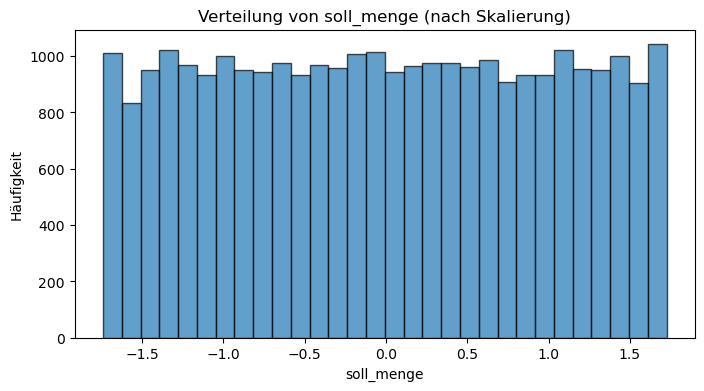

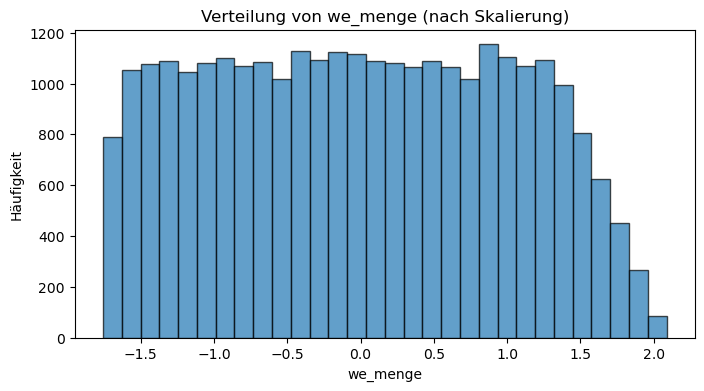

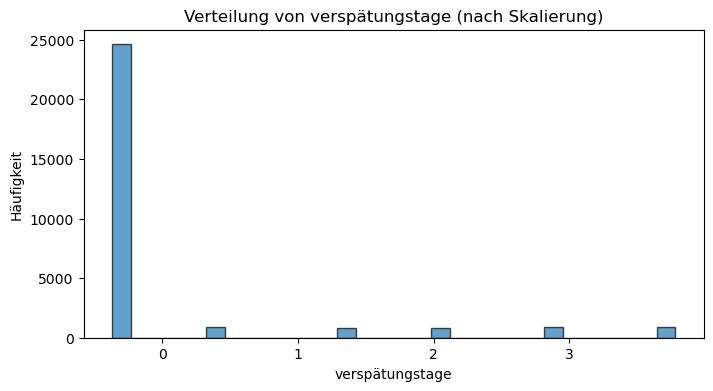

In [28]:
import matplotlib.pyplot as plt

# Verteilung der numerischen Spalten plotten
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(scaled_liefertreue_2024_df[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Verteilung von {col} (nach Skalierung)")
    plt.xlabel(col)
    plt.ylabel("Häufigkeit")
    plt.show()

#### **Ausreißer identifizieren**

**Boxplots für "verspätungstage" und "WE-Menge"**

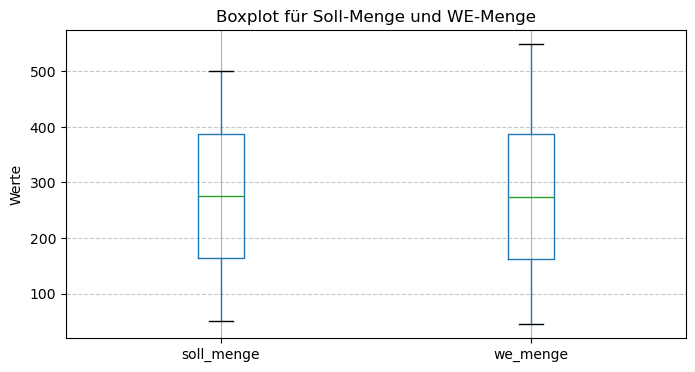

In [29]:
# Erstellen eines Boxplots für "Soll-Menge" und "WE-Menge"
plt.figure(figsize=(8,4))
cleaned_liefertreue_2024_df.boxplot(column=["soll_menge", "we_menge"])
plt.title("Boxplot für Soll-Menge und WE-Menge")
plt.ylabel("Werte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

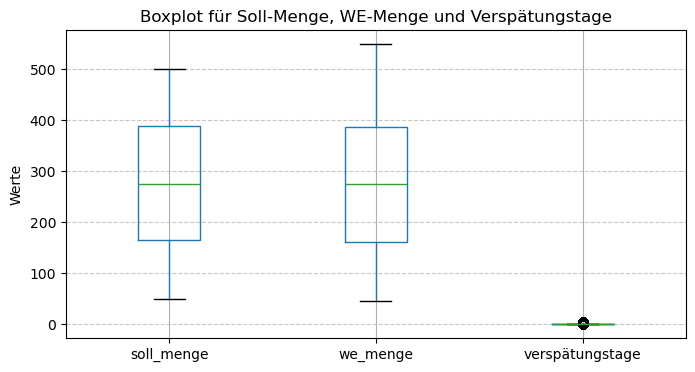

In [30]:
plt.figure(figsize=(8, 4))
cleaned_liefertreue_2024_df.boxplot(column=["soll_menge", "we_menge", "verspätungstage"])
plt.title("Boxplot für Soll-Menge, WE-Menge und Verspätungstage")
plt.ylabel("Werte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Liefertreue-Probleme**

Die groeßere Abweichung in der WE-Menge im Vergleich zur Soll-Menge deutet darauf hin, dass Lieferanten möglicherweise nicht in der Lage sind, die vollständige Menge zuverlässig zu liefern.

**Unvollständige Lieferungen**

Die vielen niedrigen Ausreißer in der WE-Menge könnten auf eine hohe Anzahl von unvollständigen Lieferungen hindeuten, was zu einer geringeren OTIF-Rate (On-Time In-Full Rate) führen könnte.

### Exploratory data analysis

In [31]:
# Datenprofil für den Liefertreue-Datensatz
data_profile = {
    "Spalte": cleaned_liefertreue_2024_df.columns,
    "Datentyp": cleaned_liefertreue_2024_df.dtypes.values,
    "Eindeutige Werte": cleaned_liefertreue_2024_df.nunique().values,
    "Fehlende Werte": cleaned_liefertreue_2024_df.isnull().sum().values,
    "Nicht-Leere Werte": cleaned_liefertreue_2024_df.notnull().sum().values,
}

profile_df = pd.DataFrame(data_profile)

print('Datenprofil für den Liefertreue-Datensatz')
# Profiling anzeigen
profile_df.head(12)

Datenprofil für den Liefertreue-Datensatz


,Spalte,Datentyp,Eindeutige Werte,Fehlende Werte,Nicht-Leere Werte
0,lieferscheinnummer,object,28869,0,28924
1,lieferantennummer,object,21,0,28924
2,lieferantenbezeichnung,object,21,0,28924
3,materialnummer,object,32,0,28924
4,materialbezeichnung,object,25,0,28924
5,land,object,8,0,28924
6,bestelldatum,datetime64[ns],349,0,28924
7,lieferdatum_soll,datetime64[ns],365,0,28924
8,wareneingangsdatum_we,datetime64[ns],365,0,28924
9,soll_menge,int64,451,0,28924


In [32]:
print(f"Form des Datensatzes: {cleaned_liefertreue_2024_df.shape}")
print(cleaned_liefertreue_2024_df.info())

Form des Datensatzes: (28924, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 28924 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   lieferscheinnummer       28924 non-null  object        
 1   lieferantennummer        28924 non-null  object        
 2   lieferantenbezeichnung   28924 non-null  object        
 3   materialnummer           28924 non-null  object        
 4   materialbezeichnung      28924 non-null  object        
 5   land                     28924 non-null  object        
 6   bestelldatum             28924 non-null  datetime64[ns]
 7   lieferdatum_soll         28924 non-null  datetime64[ns]
 8   wareneingangsdatum_we    28924 non-null  datetime64[ns]
 9   soll_menge               28924 non-null  int64         
 10  we_menge                 28924 non-null  int64         
 11  verspätungstage          28924 non-null  int64         
 12  lie

#### **Verteilung Anzahl Lieferungen nach Termintreue**

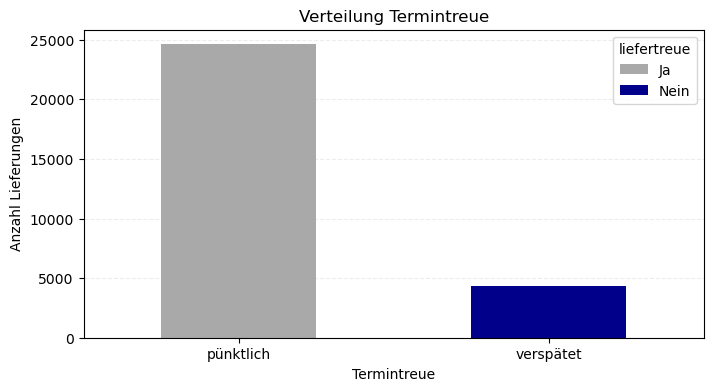

In [33]:
# Crosstab erstellen
cross_tab = pd.crosstab(cleaned_liefertreue_2024_df["termintreue"], cleaned_liefertreue_2024_df["liefertreue"])

# Plotten der Crosstab-Daten
cross_tab.plot(kind="bar", stacked=True, figsize=(8, 4), color=["darkgrey", "darkblue"])
plt.title("Verteilung Termintreue")
plt.xlabel("Termintreue")
plt.ylabel("Anzahl Lieferungen")
plt.xticks(rotation=0)
plt.legend(title="liefertreue", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.23)
plt.show()

#### **Berechnung der durchschnittlichen Verspätung pro Monat**

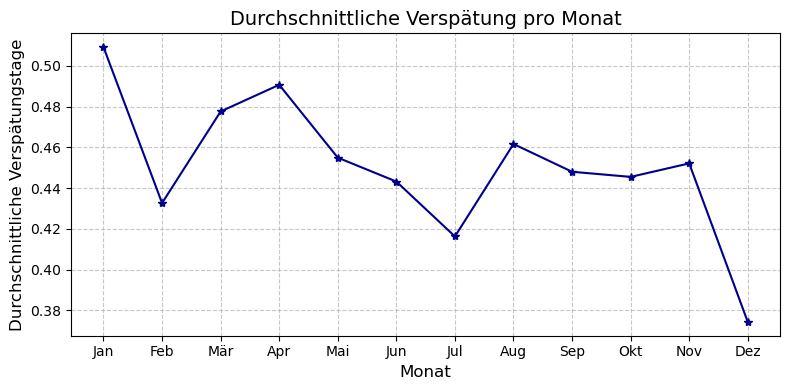

In [34]:
# Konvertierung "bestelldatum" in datetime
cleaned_liefertreue_2024_df["liefermonat"] = pd.to_datetime(
    cleaned_liefertreue_2024_df["lieferdatum_soll"], errors="coerce"
)

# Überprüfung auf ungültige Werte in "bestelldatum"
invalid_dates = cleaned_liefertreue_2024_df[cleaned_liefertreue_2024_df["lieferdatum_soll"].isnull()]
if not invalid_dates.empty:
    print("Ungültige Werte in 'lieferdatum_soll':")
    print(invalid_dates)

# Extrahiere den Monat aus "bestelldatum"
cleaned_liefertreue_2024_df["liefermonat"] = cleaned_liefertreue_2024_df["lieferdatum_soll"].dt.month

# Überprüfung der Spalte "verspätungstage"
#print("Zusammenfassung der Verspätungstage:")
#print(cleaned_liefertreue_2024_df["verspätungstage"].describe())

# Gruppierung nach Monat und Berechnung der durchschnittlichen Verspätung
monthly_summary = cleaned_liefertreue_2024_df.groupby("liefermonat")["verspätungstage"].mean()
#print("\nDurchschnittliche Verspätung pro Monat:")
#print(monthly_summary)

# Plot
plt.figure(figsize=(8, 4))
monthly_summary.plot(kind="line", marker="*", color="darkblue")
plt.title("Durchschnittliche Verspätung pro Monat", fontsize=14)
plt.xlabel("Monat", fontsize=12)
plt.ylabel("Durchschnittliche Verspätungstage", fontsize=12)
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"], fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### **Top 5 Lieferanten mit den meisten Liefertreue-Probleme**

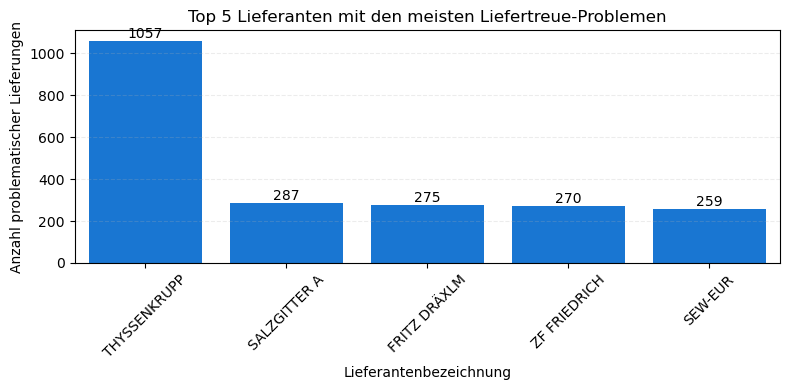

In [35]:
# Berechnung der Anzahl "Nein" (schlechte Liefertreue) pro Lieferant
problematic_deliveries_by_supplier = cleaned_liefertreue_2024_df[
    cleaned_liefertreue_2024_df["liefertreue"] == "Nein"
].groupby("lieferantenbezeichnung").size()

# Top 5 Lieferanten mit den meisten problematischen Lieferungen
top_5_suppliers = problematic_deliveries_by_supplier.sort_values(ascending=False).head(5)

colors = ["#1976D2"] * len(top_5_suppliers)  # Standardfarbe für alle Balken
if len(top_5_suppliers) == 2:
    colors = ["#1976D2", "#63B2EE"] 
    
bars = plt.bar(top_5_suppliers.index, top_5_suppliers.values, color=colors)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-Position: Mitte des Balkens
        bar.get_height() + 0.5,             # Y-Position: knapp über dem Balken
        int(bar.get_height()),              # Text (Anzahl der problematischen Lieferungen)
        ha="center", va="bottom", fontsize=10, color="black"  # Textausrichtung und Formatierung
    )

# Balkendiagramm erstellen
top_5_suppliers.plot(kind="bar", figsize=(8, 4), color=colors)
plt.title("Top 5 Lieferanten mit den meisten Liefertreue-Problemen")
plt.xlabel("Lieferantenbezeichnung")
plt.ylabel("Anzahl problematischer Lieferungen")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.23)
plt.tight_layout()
plt.show()

#### **Liefertreue nach Land**

<Figure size 800x400 with 0 Axes>

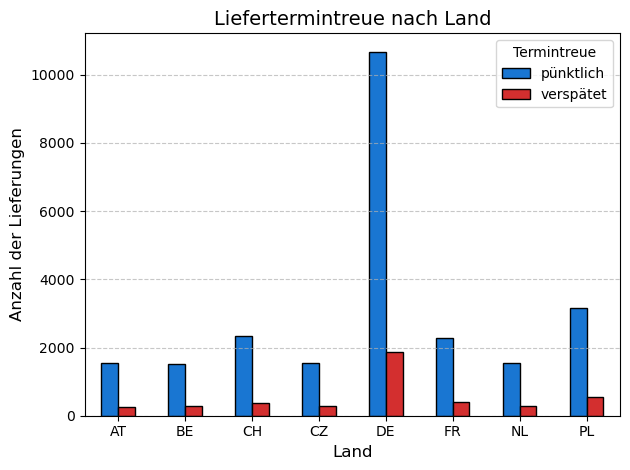

In [36]:
# Analyse Kategorische Daten und Länder

# Berechnung der Anzahl von Liefertreue ("Ja" und "Nein") nach Land
delivery_accuracy_by_country = cleaned_liefertreue_2024_df.groupby(["land", "termintreue"]).size().unstack()

# Plot: Balkendiagramm für die Termintreue nach Land
plt.figure(figsize=(8, 4))

delivery_accuracy_by_country.plot(
    kind="bar",
    stacked=False,
    color=["#1976D2", "#D32F2F", "#FFB300"],  # Farben für die Kategorien (z. B. pünktlich, verspätet, früh)
    edgecolor="black"
)

# Diagrammtitel und Achsentitel
plt.title("Liefertermintreue nach Land", fontsize=14)
plt.xlabel("Land", fontsize=12)
plt.ylabel("Anzahl der Lieferungen", fontsize=12)
plt.xticks(rotation=0, fontsize=10)  # Keine Drehung der X-Achsen-Beschriftung
plt.legend(title="Termintreue", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Horizontales Gitter für bessere Lesbarkeit
plt.tight_layout()  # Optimierung des Layouts
plt.show()

#### **Analyse der Datenverteilung - Histogramm**

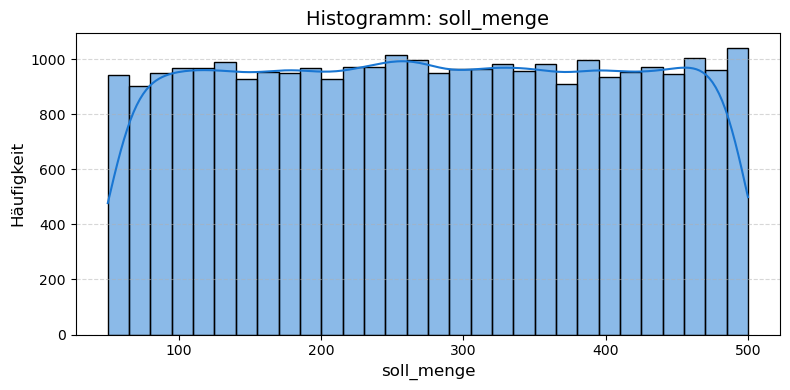

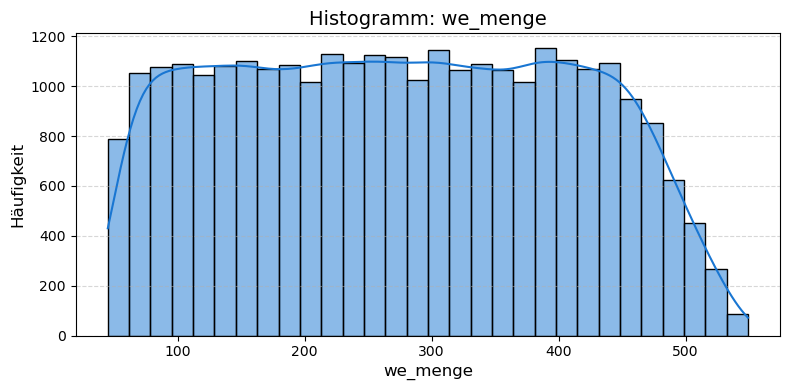

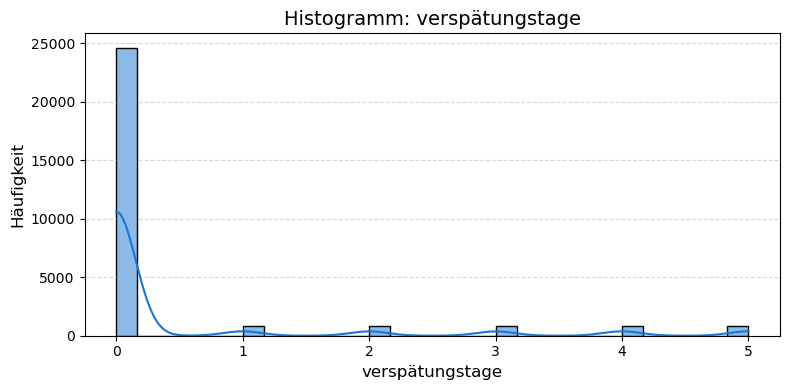

In [37]:
# Liste der numerischen Spalten zur Untersuchung

numerical_columns = ["soll_menge", "we_menge", "verspätungstage"] 

# Überprüfen, ob die Spalten im DataFrame existieren
existing_columns = [col for col in numerical_columns if col in cleaned_liefertreue_2024_df.columns]

# Histogramme für jede numerische Spalte erstellen
for column in existing_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(
        cleaned_liefertreue_2024_df[column], 
        kde=True,  # Kernel Density Estimation (Kurve)
        bins=30, 
        edgecolor="black", 
        color="#1976D2"
    )
    plt.title(f"Histogramm: {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Häufigkeit", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()  # Optimiert das Layout
    plt.show()

### **Relationships**

Zusammenhänge zwischen Variable untersuchen, wie ob Korrelationen, Muster oder Abhängikeiten vorhanden sind

In [38]:
cleaned_liefertreue_2024_df.head()

,lieferscheinnummer,lieferantennummer,lieferantenbezeichnung,materialnummer,materialbezeichnung,land,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge,verspätungstage,liefertreue,termintreue,mengenabweichung_anteil,mengenabweichung,jahreszeit,liefermonat
0,LS5412357,LA1031,SEW-EUR,A2341441,STEUERUNGEN,PL,2024-03-11,2024-04-09,2024-04-09,110,104,0,Ja,pünktlich,5.454545,-6,Frühling,4
1,LS9371283,LA1015,WIELAND-WERK,A1842836,KUPFERLEGIERUNGEN,DE,2024-07-15,2024-08-08,2024-08-11,198,210,3,Nein,verspätet,-6.060606,12,Sommer,8
2,LS6013338,LA1014,LEONI AG,A1624957,KABEL,CH,2024-03-19,2024-03-26,2024-03-26,94,88,0,Ja,pünktlich,6.382979,-6,Frühling,3
3,LS7058941,LA1018,SEW-EURODRIV,A8657694,GETRIEBEMOTOREN,DE,2024-08-12,2024-08-26,2024-08-31,250,237,5,Nein,verspätet,5.200000,-13,Sommer,8
4,LS2038973,LA1025,THYSSENKRUPP,A1864991,LENKSYSTEME,DE,2024-11-30,2024-12-21,2024-12-21,227,230,0,Ja,pünktlich,-1.321586,3,Winter,12


#### **Korrelationsmatrix**

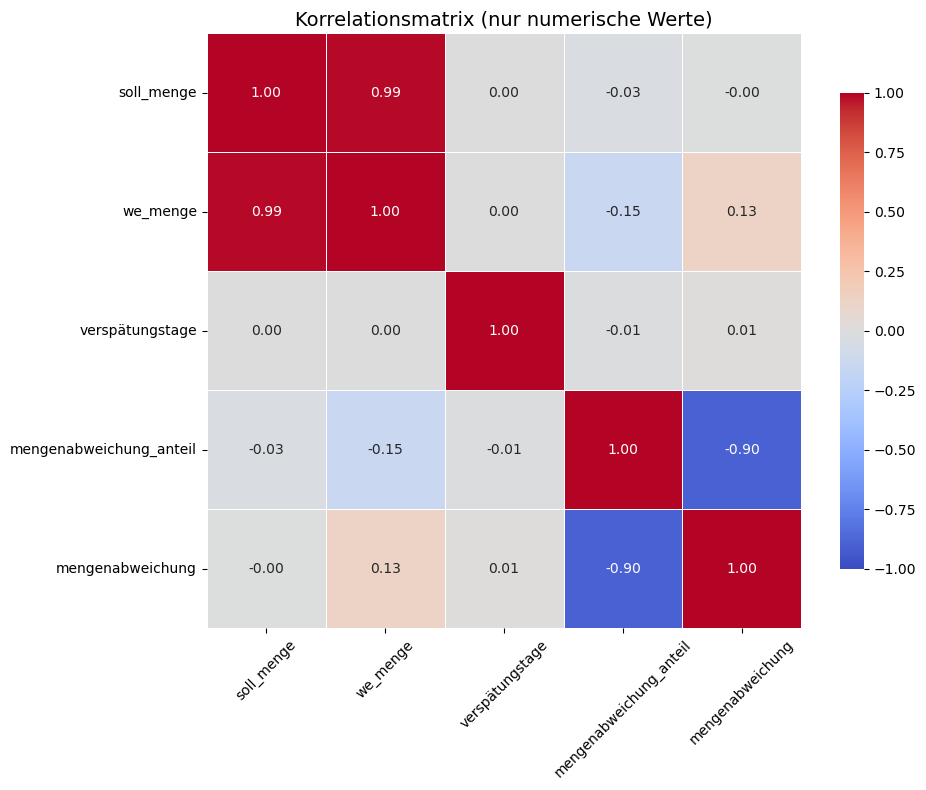

In [39]:
# Auswahl nur der numerischen Spalten
numerical_df = cleaned_liefertreue_2024_df.select_dtypes(include=["float64", "int64"])

# Korrelationsmatrix berechnen
correlation_matrix = numerical_df.corr()

# Heatmap der Korrelationen erstellen
plt.figure(figsize=(10, 8))  # Größeres Diagramm für bessere Lesbarkeit
sns.heatmap(
    correlation_matrix, 
    annot=True,           # Zeigt die Korrelationswerte direkt in den Feldern an
    cmap="coolwarm",      # Farbpalette für positive/negative Werte
    fmt=".2f",            # Formatierung der Werte (zwei Dezimalstellen)
    vmin=-1, vmax=1,      # Wertebereich der Korrelationen (-1 bis 1)
    square=True,          # Quadratische Felder für ein symmetrisches Layout
    linewidths=0.5,       # Linienstärke zwischen den Feldern
    cbar_kws={"shrink": 0.8}  # Größe der Farblegende anpassen
)
plt.title("Korrelationsmatrix (nur numerische Werte)", fontsize=14)
plt.xticks(fontsize=10, rotation=45)  # X-Achsenbeschriftung drehen
plt.yticks(fontsize=10)               # Y-Achsenbeschriftung
plt.tight_layout()                    # Optimiert das Layout
plt.show()

**Heatmap der Korrelationen - Interpretation**

Interpretation der Ergebnisse
1.	Hohe positive Korrelation (z. B. 0.98):
Eine fast perfekte positive Korrelation bedeutet, dass die Werte beider Variablen fast linear ansteigen. Beispiel: soll_menge und we_menge.
2.	Hohe negative Korrelation (z. B. -0.8):
Eine starke negative Korrelation bedeutet, dass eine Variable ansteigt, während die andere abnimmt. Beispiel: Könnte auftreten, wenn verspätungstage stark mit einer anderen Variable invers korreliert ist.
3.	Schwache oder keine Korrelation (z. B. 0.2):
Dies deutet darauf hin, dass die beiden Variablen keine starke Beziehung zueinander haben.

Heatmap:
 - Positive Korrelationen (z. B. zwischen soll_menge und we_menge) werden in Rot dargestellt.
 - Negative Korrelationen (falls vorhanden) werden in Blau dargestellt.
 - Werte nahe 1 zeigen eine starke positive Korrelation.
 - Werte nahe -1 zeigen eine starke negative Korrelation.
 - Werte nahe 0 zeigen, dass es keine Korrelation gibt.

<Figure size 800x400 with 0 Axes>

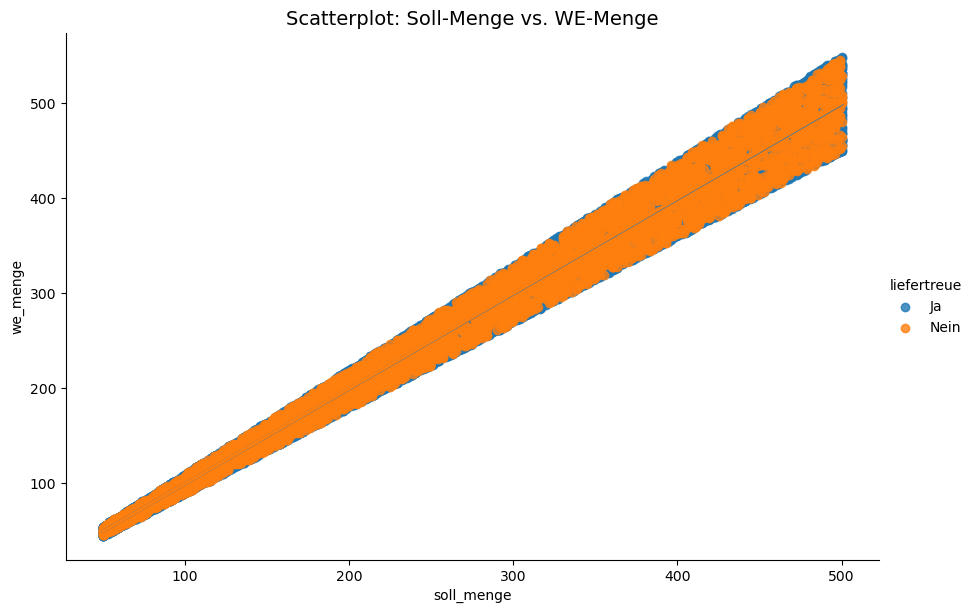

In [40]:
# Scatterplot mit Regressionslinie
# Beziehung zwischen Soll_Menge und WE_M# - Eine lineare Beziehung (dargestellt durch die Regressionslinie) deutet darauf hin, dass die WE-Menge in der Regel proportional zur Soll-Menge ist. Das wäre ein Zeichen für gut funktionierende Prozesse.
plt.figure(figsize=(8, 4))
sns.lmplot(data=cleaned_liefertreue_2024_df, x="soll_menge", y="we_menge", hue="liefertreue", height=6, aspect=1.5)
plt.title("Scatterplot: Soll-Menge vs. WE-Menge", fontsize=14)
plt.show()

Bemerkung: 

1: Starke positive Korrelation
 - Die Punkte liegen eng entlang der Regressionslinie.
 - Die WE-Menge ist proportional zur Soll-Menge.
 - Liefertreue (“Ja”) zeigt, dass pünktliche Lieferungen meist in Übereinstimmung mit der Soll-Menge erfolgen.

2: Schwache oder keine Korrelation
 - Die Punkte sind stark gestreut und haben keinen erkennbaren Trend.
 - Es gibt keine klare Beziehung zwischen Soll-Menge und WE-Menge.
 - Dies könnte auf inkonsistente Prozesse bei Lieferanten hinweisen.

3: Auffällige Streuung nach Liefertreue
 - Lieferungen mit schlechter Liefertreue (“Nein”) weichen stärker von der Soll-Menge ab.
 - Dies deutet darauf hin, dass verspätete Lieferungen häufiger auch Probleme bei der Übereinstimmung der Mengen haben.

## Model

### Select model

Die logistische Regression ist eine geeignete Wahl für dieses Problem, da die Zielvariable liefertreue binär ist (Ja/Nein). Sie eignet sich gut, um die Beziehung zwischen den Eingangsvariablen (z. B. soll_menge, we_menge, verspätungstage) und der Zielvariable zu modellieren, und liefert interpretable Ergebnisse. Zudem ist sie effizient und robust bei linearen Zusammenhängen und bietet Informationen zur Bedeutung der einzelnen Eingangsvariablen.

 - Eingangsvariablen: soll_menge, we_menge, verspätungstage, land, termintreue.
 - Zielvariable: liefertreue (Ja/Nein).
 - Die logistische Regression kann verwendet werden, um vorherzusagen, ob eine Lieferung pünktlich sein wird, basierend auf diesen Merkmalen.

### Training and validation

In [41]:
# Features und Zielvariable aus Trainings- und Testdaten extrahieren
X_train = train_data_df[["soll_menge", "we_menge", "verspätungstage"]]  
y_train = train_data_df["liefertreue"].map({"Ja": 1, "Nein": 0})  

X_test = test_data_df[["soll_menge", "we_menge", "verspätungstage"]]  
y_test = test_data_df["liefertreue"].map({"Ja": 1, "Nein": 0})  

print("Features und Zielvariable aus Trainings- und Testdaten erfolgreich extrahiert.")

Features und Zielvariable aus Trainings- und Testdaten erfolgreich extrahiert.


In [42]:
# Dummy-Kodierung für kategorische Variablen (jahreszeit, land)
train_data_encoded = pd.get_dummies(train_data_df, columns=["jahreszeit", "land"], drop_first=True)
test_data_encoded = pd.get_dummies(test_data_df, columns=["jahreszeit", "land"], drop_first=True)

# Sicherstellen, dass beide Datensätze dieselben Spalten haben (falls Unterschiede auftreten)
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join="left", axis=1, fill_value=0)

# Features und Zielvariable extrahieren
X_train = train_data_encoded[["soll_menge", "we_menge", "verspätungstage"] +
                             [col for col in train_data_encoded.columns if col.startswith("jahreszeit_") or col.startswith("land_")]]
y_train = train_data_encoded["liefertreue"].map({"Ja": 1, "Nein": 0})

X_test = test_data_encoded[["soll_menge", "we_menge", "verspätungstage"] +
                           [col for col in test_data_encoded.columns if col.startswith("jahreszeit_") or col.startswith("land_")]]
y_test = test_data_encoded["liefertreue"].map({"Ja": 1, "Nein": 0})

print("Features und Zielvariable aus Trainings- und Testdaten erfolgreich extrahiert.")

Features und Zielvariable aus Trainings- und Testdaten erfolgreich extrahiert.


In [43]:
train_data_df.head()

,lieferscheinnummer,lieferantennummer,lieferantenbezeichnung,materialnummer,materialbezeichnung,land,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge,verspätungstage,liefertreue,termintreue,mengenabweichung_anteil,mengenabweichung,jahreszeit
19636,LS3573007,LA1000,ROBERT BOSCH,A4790913,UNIVERSALAUTOMOBILZULIEFERER,DE,2024-02-18,2024-03-04,2024-03-04,78,71,0,Ja,pünktlich,8.974359,-7,Frühling
14162,LS8921828,LA1029,FRITZ DRÄXLM,A3308310,ELEKTRONIK,NL,2024-06-05,2024-06-19,2024-06-19,97,99,0,Ja,pünktlich,-2.061856,2,Sommer
25182,LS2378876,LA1000,ROBERT BOSCH,A4790913,UNIVERSALAUTOMOBILZULIEFERER,DE,2024-01-22,2024-02-19,2024-02-19,203,185,0,Ja,pünktlich,8.866995,-18,Winter
1818,LS2802445,LA1014,LEONI AG,A1624957,KABEL,CH,2024-05-28,2024-06-23,2024-06-23,131,139,0,Ja,pünktlich,-6.106870,8,Sommer
17124,LS3418446,LA1001,CONTINENTAL,A5332867,UNIVERSALZULIEFERER,AT,2024-08-01,2024-08-07,2024-08-07,425,406,0,Ja,pünktlich,4.470588,-19,Sommer


In [44]:
test_data_df.head()

,lieferscheinnummer,lieferantennummer,lieferantenbezeichnung,materialnummer,materialbezeichnung,land,bestelldatum,lieferdatum_soll,wareneingangsdatum_we,soll_menge,we_menge,verspätungstage,liefertreue,termintreue,mengenabweichung_anteil,mengenabweichung,jahreszeit
14242,LS9262113,LA1025,THYSSENKRUPP,A5857723,BLECK,DE,2024-09-25,2024-10-06,2024-10-06,391,417,0,Ja,pünktlich,-6.649616,26,Herbst
17213,LS6622846,LA1018,SEW-EURODRIV,A8657694,GETRIEBEMOTOREN,DE,2024-06-06,2024-06-22,2024-06-22,342,374,0,Ja,pünktlich,-9.356725,32,Sommer
5126,LS3392530,LA1031,SEW-EUR,A5491705,FREQUENZUMRICHTER,PL,2024-03-26,2024-04-24,2024-04-29,78,82,5,Nein,verspätet,-5.128205,4,Frühling
24425,LS8476165,LA1013,VOITH GMBH &,A1532724,WASSERKRAFTANLAGEN,BE,2024-08-11,2024-09-05,2024-09-05,493,486,0,Ja,pünktlich,1.419878,-7,Herbst
1664,LS9714984,LA1007,INFINEON TEC,A2294182,ELEKTRONIK,CZ,2024-11-10,2024-11-15,2024-11-15,443,430,0,Ja,pünktlich,2.934537,-13,Herbst


#### **Dummy-Daten anzeigen**

In [45]:
# Nur die Dummy-Variablen im DataFrame anzeigen
dummy_data = train_data_encoded[[col for col in train_data_encoded.columns if col.startswith("jahreszeit_") or col.startswith("land_")]]
print("Dummy-Daten (nur Dummy-Variablen):")
print(dummy_data.head())

Dummy-Daten (nur Dummy-Variablen):
       jahreszeit_Herbst  jahreszeit_Sommer  jahreszeit_Winter  land_BE  \
19636              False              False              False    False   
14162              False               True              False    False   
25182              False              False               True    False   
1818               False               True              False    False   
17124              False               True              False    False   

       land_CH  land_CZ  land_DE  land_FR  land_NL  land_PL  
19636    False    False     True    False    False    False  
14162    False    False    False    False     True    False  
25182    False    False     True    False    False    False  
1818      True    False    False    False    False    False  
17124    False    False    False    False    False    False  


### Fit model

In [46]:
!pip install scikit-learn

In [47]:
# Verwendung von Trainingsdaten (train_data_df) für das Modelltraining
from sklearn.linear_model import LogisticRegression

# Standardisierung der numerischen Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trainiere das Modell mit den skalierten Daten
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Logistisches Regressionsmodell wurde erfolgreich mit skalierten Daten trainiert.")
model

# Vorhersage und Evaluierung
y_pred = model.predict(X_test_scaled)
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

# Konfusionsmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Konfusionsmatrix:")
print(conf_matrix)

Logistisches Regressionsmodell wurde erfolgreich mit skalierten Daten trainiert.
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1265
           1       1.00      1.00      1.00      7413

    accuracy                           1.00      8678
   macro avg       1.00      1.00      1.00      8678
weighted avg       1.00      1.00      1.00      8678

Konfusionsmatrix:
[[1265    0]
 [   0 7413]]


In [48]:
# Anzeige der Modell-Koeffizienten
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Koeffizient": model.coef_[0]
}).sort_values(by="Koeffizient", ascending=False)

print("Koeffizienten der logistischen Regression:")
print(coefficients)

Koeffizienten der logistischen Regression:
              Feature  Koeffizient
7             land_CH     0.042498
8             land_CZ     0.036729
11            land_NL     0.033585
1            we_menge     0.017909
5   jahreszeit_Winter     0.015056
0          soll_menge     0.010763
10            land_FR     0.006000
12            land_PL    -0.000746
3   jahreszeit_Herbst    -0.000899
4   jahreszeit_Sommer    -0.005686
9             land_DE    -0.024922
6             land_BE    -0.038329
2     verspätungstage   -12.808870


interpretation der Koeffizienten:

Bemerkung: 
- Positive Koeffizienten bedeuten, dass der entsprechende Wert die Wahrscheinlichkeit für die Zielvariable (Ja) erhöht.
- Negative Koeffizienten bedeuten, dass der entsprechende Wert die Wahrscheinlichkeit für die Zielvariable (Nein) erhöht.

### **Evaluation on test set**

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1265
           1       0.99      1.00      1.00      7413

    accuracy                           0.99      8678
   macro avg       1.00      0.97      0.98      8678
weighted avg       0.99      0.99      0.99      8678

Konfusionsmatrix:
[[1197   68]
 [   0 7413]]


/Users/priscilastromsdorfer/opt/anaconda3/envs/analytics/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


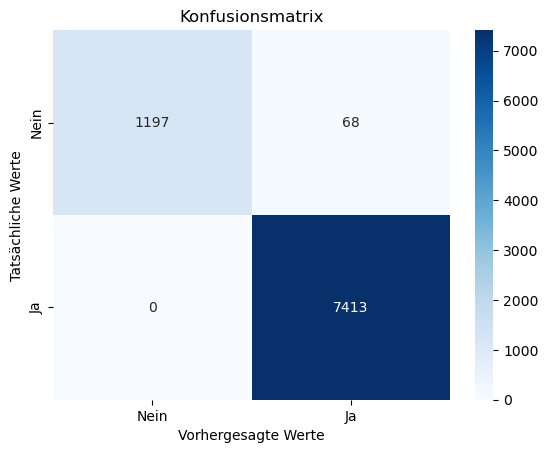

In [49]:

# Die Testdaten (test_data_df) werden für die Vorhersage und Bewertung verwendet.

# Vorhersagen auf den Testdaten
y_pred = model.predict(X_test)

# Klassifikationsbericht
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

# Konfusionsmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Konfusionsmatrix:")
print(conf_matrix)

# Visualisierung der Konfusionsmatrix (optional)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Nein", "Ja"], yticklabels=["Nein", "Ja"])
plt.title("Konfusionsmatrix")
plt.xlabel("Vorhergesagte Werte")
plt.ylabel("Tatsächliche Werte")

plt.savefig("../reports/images/koeffizienten_liefertreue.png")
plt.show()


Klassifikationsbericht:
 - Metriken wie Precision, Recall, F1-Score und Accuracy helfen dir, die Modellleistung zu bewerten.

Konfusionsmatrix:
 - Zeigt, wie viele Vorhersagen korrekt und wie viele falsch waren:
 - True Positives (TP): Korrekt vorhergesagte Ja-Werte.
 - True Negatives (TN): Korrekt vorhergesagte Nein-Werte.
 - False Positives (FP): Nein-Werte, die fälschlicherweise als Ja vorhergesagt wurden.
 - False Negatives (FN): Ja-Werte, die fälschlicherweise als Nein vorhergesagt wurden.

### **Wahrscheinlichkeiten abrufen**

In [50]:
# Wahrscheinlichkeiten abrufen
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeit für die Klasse "Ja"
test_results = pd.DataFrame({
    "Tatsächliche Werte": y_test,
    "Vorhergesagte Wahrscheinlichkeit (Ja)": y_pred_probs
})
print(test_results.head())

       Tatsächliche Werte  Vorhergesagte Wahrscheinlichkeit (Ja)
14242                   1                           9.999990e-01
17213                   1                           9.999963e-01
5126                    0                           1.346275e-26
24425                   1                           9.999999e-01
1664                    1                           9.999996e-01


/Users/priscilastromsdorfer/opt/anaconda3/envs/analytics/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


| Tatsächliche Werte | Vorhergesagte Wahrscheinlichkeit (Ja) | Interpretation                                                                 |
|--------------------|---------------------------------------|-------------------------------------------------------------------------------|
| 1                  | 9.999990e-01 (≈ 1.0)                | Das Modell sagt mit sehr hoher Wahrscheinlichkeit (~99.9999%) voraus, dass dies ein "Ja"-Fall ist, was korrekt ist. |
| 1                  | 9.999963e-01 (≈ 1.0)                | Auch hier ist das Modell fast zu 100 % sicher, dass dies ein "Ja"-Fall ist, was ebenfalls korrekt ist.              |
| 0                  | 1.346275e-26 (≈ 0.0)                | Das Modell ist sich extrem sicher (~0.0% Wahrscheinlichkeit für "Ja") und sagt korrekt "Nein" voraus.               |
| 1                  | 9.999999e-01 (≈ 1.0)                | Das Modell sagt "Ja" mit fast 100 % Sicherheit voraus, was richtig ist.                                            |
| 1                  | 9.999996e-01 (≈ 1.0)                | Wieder eine korrekte Vorhersage, dass dies ein "Ja"-Fall ist, mit einer Wahrscheinlichkeit von 99.99996 %.          |

Interpretation der Spalten

Tatsächliche Werte:
 - Diese Spalte zeigt die tatsächlichen Klassenwerte aus den Testdaten:
 - 1 steht für "Ja" (Liefertreue vorhanden).
 - 0 steht für "Nein" (Liefertreue nicht vorhanden).


Vorhergesagte Wahrscheinlichkeit (Ja):
 - Dies ist die Wahrscheinlichkeit, die das Modell der Klasse "Ja" zuweist.
 - Sie liegt immer im Bereich [0, 1]:
 - Werte nahe 1: Das Modell ist sich sicher, dass die Klasse "Ja" korrekt ist.
 - Werte nahe 0: Das Modell ist sich sicher, dass die Klasse "Nein" korrekt ist.

Wahrscheinlichkeiten: 
    
Das Modell zeigt hohe Sicherheit in seinen Vorhersagen, da die Wahrscheinlichkeiten sehr nahe bei 1.0 (für "Ja") oder 0.0 (für "Nein") liegen.

Die Auswertung der Wahrscheinlichkeiten erlaubt es,:
 - die Sicherheit des Modells zu analysieren,
 - potenziell schwierige Fälle zu identifizieren,
 - den Schwellenwert anzupassen, um die Sensitivität oder Spezifität zu steuern.

### **Save model**



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

In [51]:
# Modell speichern
model_path = "logistic_regression_model_liefertreue.pkl"
joblib.dump(model, model_path)
print(f"Modell wurde gespeichert unter: {model_path}")

# Modell laden
loaded_model = joblib.load(model_path)
print("Gespeichertes Modell wurde erfolgreich geladen.")

Modell wurde gespeichert unter: logistic_regression_model_liefertreue.pkl
Gespeichertes Modell wurde erfolgreich geladen.


### **Chi-Quadrat Test**

#### **Chi-Quadrat Test zwischen Land und Liefertreue**

In [52]:
from scipy.stats import chi2_contingency

# Kontingenztabelle erstellen (z. B. Liefertreue nach Land)
contingency_table = pd.crosstab(cleaned_liefertreue_2024_df["land"], cleaned_liefertreue_2024_df["liefertreue"])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Ergebnisse ausgeben
print("Chi-Quadrat-Test Ergebnisse:")
print(f"Chi-Quadrat-Statistik: {chi2}")
print(f"p-Wert: {p}")
print(f"Freiheitsgrade: {dof}")
print("\nErwartete Häufigkeiten (falls keine Abhängigkeit besteht):")
print(expected)

# Interpretation basierend auf p-Wert
if p < 0.05:
    print("\nErgebnis: Es besteht ein signifikanter Zusammenhang zwischen den Variablen (p < 0.05).")
else:
    print("\nErgebnis: Es gibt keinen signifikanten Zusammenhang zwischen den Variablen (p >= 0.05).")

Chi-Quadrat-Test Ergebnisse:
Chi-Quadrat-Statistik: 2.8522134334790685
p-Wert: 0.8983287717893658
Freiheitsgrade: 7

Erwartete Häufigkeiten (falls keine Abhängigkeit besteht):
[[ 1539.72652469   270.27347531]
 [ 1538.02516941   269.97483059]
 [ 2314.69385286   406.30614714]
 [ 1543.12923524   270.87076476]
 [10670.90029042  1873.09970958]
 [ 2296.82962246   403.17037754]
 [ 1558.44143272   273.55856728]
 [ 3143.25387222   551.74612778]]

Ergebnis: Es gibt keinen signifikanten Zusammenhang zwischen den Variablen (p >= 0.05).


| **Metrik**              | **Ergebnis**                                                                                      |
|--------------------------|--------------------------------------------------------------------------------------------------|
| **Chi-Quadrat-Statistik** | 2.852 - Geringe Abweichung zwischen beobachteten und erwarteten Häufigkeiten.                    |
| **p-Wert**               | 0.898 - Kein signifikanter Zusammenhang (p > 0.05).                                              |
| **Freiheitsgrade**       | 7 - Basierend auf der Anzahl der Kategorien der getesteten Variablen.                            |
| **Erwartete Häufigkeiten** | Frequenzen, die bei vollständiger Unabhängigkeit der Variablen zu erwarten wären.                |
| **Interpretation**       | Es gibt keinen statistisch signifikanten Zusammenhang zwischen den getesteten Variablen.         |

#### **Chi-Quadrat Test zwischen Jahreszeit und Liefertreue**

In [53]:
# Kontingenztabelle erstellen (z. B. Liefertreue nach Land)
contingency_table2 = pd.crosstab(cleaned_liefertreue_2024_df["jahreszeit"], cleaned_liefertreue_2024_df["liefertreue"])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(contingency_table2)

# Ergebnisse ausgeben
print("Chi-Quadrat-Test Ergebnisse:")
print(f"Chi-Quadrat-Statistik: {chi2}")
print(f"p-Wert: {p}")
print(f"Freiheitsgrade: {dof}")
print("\nErwartete Häufigkeiten (falls keine Abhängigkeit besteht):")
print(expected)

# Interpretation basierend auf p-Wert
if p < 0.05:
    print("\nErgebnis: Es besteht ein signifikanter Zusammenhang zwischen den Variablen (p < 0.05).")
else:
    print("\nErgebnis: Es gibt keinen signifikanten Zusammenhang zwischen den Variablen (p >= 0.05).")

Chi-Quadrat-Test Ergebnisse:
Chi-Quadrat-Statistik: 3.859496376323788
p-Wert: 0.27704113793354596
Freiheitsgrade: 3

Erwartete Häufigkeiten (falls keine Abhängigkeit besteht):
[[6668.46200387 1170.53799613]
 [6264.39012585 1099.60987415]
 [6613.16795741 1160.83204259]
 [5058.97991288  888.02008712]]

Ergebnis: Es gibt keinen signifikanten Zusammenhang zwischen den Variablen (p >= 0.05).


#### **Chi-Quadrat Test zwischen Termintreue und Liefertreue**

In [54]:
# Kontingenztabelle erstellen (z. B. Liefertreue nach Land)
contingency_table2 = pd.crosstab(cleaned_liefertreue_2024_df["termintreue"], cleaned_liefertreue_2024_df["liefertreue"])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(contingency_table2)

# Ergebnisse ausgeben
print("Chi-Quadrat-Test Ergebnisse:")
print(f"Chi-Quadrat-Statistik: {chi2}")
print(f"p-Wert: {p}")
print(f"Freiheitsgrade: {dof}")
print("\nErwartete Häufigkeiten (falls keine Abhängigkeit besteht):")
print(expected)

# Interpretation basierend auf p-Wert
if p < 0.05:
    print("\nErgebnis: Es besteht ein signifikanter Zusammenhang zwischen den Variablen (p < 0.05).")
else:
    print("\nErgebnis: Es gibt keinen signifikanten Zusammenhang zwischen den Variablen (p >= 0.05).")

Chi-Quadrat-Test Ergebnisse:
Chi-Quadrat-Statistik: 28916.128081664036
p-Wert: 0.0
Freiheitsgrade: 1

Erwartete Häufigkeiten (falls keine Abhängigkeit besteht):
[[20930.9232817  3674.0767183]
 [ 3674.0767183   644.9232817]]

Ergebnis: Es besteht ein signifikanter Zusammenhang zwischen den Variablen (p < 0.05).


| **Metrik**              | **Ergebnis**                                                                                      |
|--------------------------|--------------------------------------------------------------------------------------------------|
| **Chi-Quadrat-Statistik** | 28916.13 - Sehr hohe Abweichung zwischen den beobachteten und erwarteten Häufigkeiten.           |
| **p-Wert**               | 0.0 - Ein extrem signifikanter Zusammenhang zwischen `termintreue` und `liefertreue` (p < 0.05). |
| **Freiheitsgrade**       | 1 - Basierend auf der Größe der Kontingenztabelle.                                               |
| **Erwartete Häufigkeiten** | [[20930.92, 3674.08], [3674.08, 644.92]] - Frequenzen, die bei vollständiger Unabhängigkeit erwartet würden. |
| **Interpretation**       | Es besteht ein hoch signifikanter Zusammenhang zwischen den Variablen `termintreue` und `liefertreue`. Die Verteilung der Werte zeigt, dass die Termintreue eng mit der Liefertreue verknüpft ist. |

Die Ergebnisse bestätigen, dass die Termintreue ein starker Prädiktor für die Liefertreue ist. Wenn eine Lieferung verspätet oder früh erfolgt, ist die Wahrscheinlichkeit für fehlende Liefertreue (Nein) signifikant höher. 

## Conclusions

Einfluss der Features auf die Liefertreue:
              Feature  Koeffizient
7             land_CH     0.042498
8             land_CZ     0.036729
11            land_NL     0.033585
1            we_menge     0.017909
5   jahreszeit_Winter     0.015056
0          soll_menge     0.010763
10            land_FR     0.006000
12            land_PL    -0.000746
3   jahreszeit_Herbst    -0.000899
4   jahreszeit_Sommer    -0.005686
9             land_DE    -0.024922
6             land_BE    -0.038329
2     verspätungstage   -12.808870


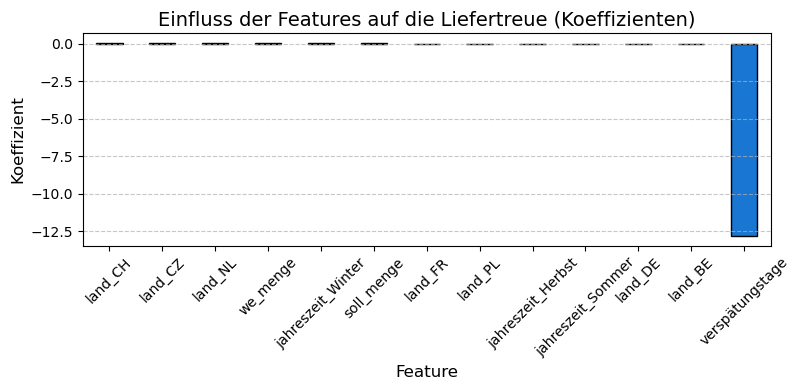

In [55]:
# Analyse der Koeffizienten
# hilft, den Einfluss der einzelnen Features auf die Zielvariable (Liefertreue) zu interpretieren.

# Erstellen eines DataFrames mit den Koeffizienten
coefficients = pd.DataFrame({
    "Feature": X_train.columns,    # Namen der Features
    "Koeffizient": model.coef_[0]  # Die Koeffizienten des Modells
})

# Sortieren der Koeffizienten nach ihrem Einfluss
coefficients = coefficients.sort_values(by="Koeffizient", ascending=False)

# Ausgabe der Koeffizienten
print("Einfluss der Features auf die Liefertreue:")
print(coefficients)

# Optional: Visualisierung der Koeffizienten als Balkendiagramm
plt.figure(figsize=(8, 4))
coefficients.set_index("Feature")["Koeffizient"].plot(kind="bar", color="#1976D2", edgecolor="black")
plt.title("Einfluss der Features auf die Liefertreue (Koeffizienten)", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Koeffizient", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

model.coef_:
 - Die logistische Regression gibt die Koeffizienten für jedes Feature im Modell zurück.
 - Positive Koeffizienten: Ein Anstieg des Wertes dieses Features erhöht die Wahrscheinlichkeit, dass die Zielvariable den Wert 1 (Ja) hat.
 - Negative Koeffizienten: Ein Anstieg des Wertes dieses Features reduziert die Wahrscheinlichkeit, dass die Zielvariable den Wert 1 (Ja) hat.

In [56]:
positive_influence = coefficients[coefficients["Koeffizient"] > 0]
negative_influence = coefficients[coefficients["Koeffizient"] < 0]
print("Positive Einflussfaktoren:")
print(positive_influence)
print("Negative Einflussfaktoren:")
print(negative_influence)

Positive Einflussfaktoren:
              Feature  Koeffizient
7             land_CH     0.042498
8             land_CZ     0.036729
11            land_NL     0.033585
1            we_menge     0.017909
5   jahreszeit_Winter     0.015056
0          soll_menge     0.010763
10            land_FR     0.006000
Negative Einflussfaktoren:
              Feature  Koeffizient
12            land_PL    -0.000746
3   jahreszeit_Herbst    -0.000899
4   jahreszeit_Sommer    -0.005686
9             land_DE    -0.024922
6             land_BE    -0.038329
2     verspätungstage   -12.808870


Zusammenhang:
 - Positive Koeffizienten: Erhöhen die Wahrscheinlichkeit für Liefertreue = "Ja".
 - Negative Koeffizienten: Reduzieren die Wahrscheinlichkeit für Liefertreue = "Ja".

### Conclusion

**Zusammenfassung - 14.01.25**

| **Feature**           | **Koeffizient** | **Einfluss**                                                                                 |
|------------------------|-----------------|---------------------------------------------------------------------------------------------|
| verspätungstage        | -12.81          | Stärkster negativer Einfluss. Jede zusätzliche Verspätungstag reduziert die Liefertreue stark. |
| we_menge               | 0.018           | Moderat positiver Einfluss. Höhere gelieferte Mengen verbessern die Wahrscheinlichkeit der Liefertreue. |
| soll_menge             | 0.011           | Gering positiver Einfluss. Größere Bestellungen korrelieren leicht mit besserer Liefertreue. |
| land_CH (Schweiz)      | 0.043           | Leichter positiver Einfluss. Gute logistische Leistung.                                      |
| land_CZ (Tschechien)   | 0.037           | Leichter positiver Einfluss. Gute logistische Leistung.                                      |
| land_NL (Niederlande)  | 0.034           | Leichter positiver Einfluss. Gute logistische Leistung.                                      |
| land_BE (Belgien)      | -0.038          | Leichter negativer Einfluss. Potenzielle regionale Herausforderungen.                       |
| land_DE (Deutschland)  | -0.025          | Leichter negativer Einfluss. Potenzielle regionale Herausforderungen.                       |
| jahreszeit_Winter      | 0.015           | Leichter positiver Einfluss. Möglicherweise bessere Planung in der Winterperiode.           |
| jahreszeit_Sommer      | -0.006          | Gering negativer Einfluss. Urlaubszeiten könnten Liefertreue leicht beeinträchtigen.         |
| jahreszeit_Herbst      | -0.001          | Minimal negativer Einfluss.                                                                 |

**Entscheidender Einflussfaktor: verspätungstage**
 - Koeffizient: -12.81

Bedeutung:
 - Die verspätungstage (Tage der Verzögerung) haben mit Abstand den stärksten negativen Einfluss auf die Liefertreue.
 - Je mehr Tage eine Lieferung verspätet ist, desto geringer ist die Wahrscheinlichkeit, dass sie als “pünktlich” (Liefertreue = Ja) eingestuft wird.
 - Dieser starke negative Einfluss ist logisch, da Verspätungen ein klarer Indikator für fehlende Liefertreue sind.

**Handlungsempfehlung** 

Um die Liefertreue nachhaltig zu verbessern, sollten gezielte Maßnahmen in den folgenden Bereichen umgesetzt werden:
1.	Verspätungen minimieren:
Der drastische negative Einfluss der verspätungstage verdeutlicht die Dringlichkeit, die Lieferprozesse zu optimieren, um Verspätungen zu vermeiden. Lieferanten und Regionen mit häufiger verspäteten Lieferungen sollten identifiziert und spezifische Verbesserungspläne entwickelt werden.
2.	Regionale Maßnahmen:
Besonderes Augenmerk sollte auf Länder mit negativem Einfluss gelegt werden, wie beispielsweise Deutschland und Belgien. Eine detaillierte Analyse der Lieferperformance in diesen Regionen kann helfen, gezielte Verbesserungsmaßnahmen einzuleiten.
3.	Saisonale Planung:
Da sich im Sommer eine leichte Verschlechterung der Liefertreue zeigt, sollte die Planung in dieser Jahreszeit effizienter gestaltet werden. Dies könnte die Auswirkungen von Urlaubszeiten und saisonalen Schwankungen auf die Lieferkette minimieren.
4.	Mengenplanung:
Die Sicherstellung vollständiger Lieferungen ist von zentraler Bedeutung, da sowohl die bestellte als auch die gelieferte Menge einen positiven Effekt auf die Liefertreue haben. Effiziente Mengenplanung und Überwachung können die Zuverlässigkeit der Lieferungen erhöhen.

In einer zunehmend vernetzten und komplexen Wirtschaft ist eine reibungslos funktionierende Lieferkette entscheidend, um Produktionsziele zu erreichen und die Wettbewerbsfähigkeit zu sichern. Lieferengpässe und Produktionsunterbrechungen stellen dabei nicht nur ein erhebliches finanzielles Risiko dar, sondern gefährden auch die Reputation des Unternehmens und die Kundenzufriedenheit.

Die Analyse der Liefertreue zeigt klar auf, dass Faktoren wie verspätete Lieferungen, unvollständige Mengen und regionale Unterschiede signifikante Auswirkungen auf die Zuverlässigkeit der Lieferkette haben können. Diese Schwachstellen dürfen nicht unterschätzt werden. Ein Versäumnis, rechtzeitig Gegenmaßnahmen einzuleiten, kann gravierende Folgen für den gesamten Produktionsprozess haben.

Daher sollte die Supply-Chain-Abteilung das Thema Liefertreue mit höchster Priorität angehen. Dies umfasst nicht nur die Identifikation und Analyse von Problemfeldern, sondern auch die Umsetzung konkreter Maßnahmen zur Prozessoptimierung. Lieferantenbeziehungen müssen proaktiv gestaltet, Engpässe frühzeitig erkannt und saisonale sowie regionale Herausforderungen besser berücksichtigt werden.

Nur durch eine ernsthafte Auseinandersetzung mit diesen Themen kann sichergestellt werden, dass die Lieferkette robust bleibt und das Unternehmen langfristig erfolgreich ist. Es ist Zeit, die Lieferkette nicht als bloße Unterstützung, sondern als strategischen Erfolgsfaktor zu betrachten.


### Dataframe als PKL und Excel-Speichern

In [57]:
# Speichern des DataFrames
export_path = "../data/pkl/final_liefertreue_dataset_2024.pkl"
joblib.dump(cleaned_liefertreue_2024_df, export_path)
print(f"DataFrame gespeichert unter: {export_path}")

# Speichern als .xlsx-Datei (Excel)
excel_path = "../data/processed/final_liefertreue_dataset_2024.xlsx"
cleaned_liefertreue_2024_df.to_excel(excel_path, index=False)
print(f"DataFrame als Excel-Datei gespeichert unter: {excel_path}")

DataFrame gespeichert unter: ../data/pkl/final_liefertreue_dataset_2024.pkl
DataFrame als Excel-Datei gespeichert unter: ../data/processed/final_liefertreue_dataset_2024.xlsx


### HTML Speichern

In [58]:
!jupyter nbconvert --to html final-analysis.ipynb

[NbConvertApp] Converting notebook final-analysis.ipynb to html
[NbConvertApp] Writing 1289604 bytes to final-analysis.html
